In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

data = pd.read_csv("data/sistema-unico-de-atencion-ciudadana-2021.csv", sep=";")
data_2022 = pd.read_csv("data/sistema-unico-de-atencion-ciudadana-2022.csv", sep=";")
streets = gpd.read_file("res/calles-geojson.json", driver="GeoJSON")
barrios = gpd.read_file("res/barrios-geojson.json", driver="GeoJSON")
comunas = gpd.read_file("res/comunas-geojson.json", driver="GeoJSON")

In [8]:
import datetime as dt

# Preprocessing
To merge 2021 and 2022 data and take as much as possible

In [2]:
data_2022.sample(4)

contacto  periodo               categoria           subcategoria  \
9374   00008732/22   202201                TRÁNSITO          DENUNCIA VIAL   
84029  00084500/22   202203  LIMPIEZA Y RECOLECCIÓN   RESIDUOS VOLUMINOSOS   
65896  00065581/22   202202  LIMPIEZA Y RECOLECCIÓN   RESIDUOS VOLUMINOSOS   
96943  00093513/22   202203  LIMPIEZA Y RECOLECCIÓN  CESTOS Y CONTENEDORES   

                                        prestacion tipo_prestacion  \
9374                      Vehículo mal estacionado        Denuncia   
84029  Retiro de restos de jardinería domiciliaria        Servicio   
65896         Retiro de escombros / restos de obra        Servicio   
96943                        Vaciado de contenedor           Queja   

      fecha_ingreso hora_ingreso  domicilio_comuna domicilio_barrio  \
9374     2022-01-09     18:51:12              14.0          Palermo   
84029    2022-03-01     15:03:17              14.0          Palermo   
65896    2022-02-16     20:04:32              14.0          Palermo   
96943    2022-03-07     09:20:05              15.0         Paternal   

              domicilio_calle  domicilio_altura domicilio_esquina_proxima  \
9374                   CRAMER             381.0                       NaN   
84029  RAVIGNANI, EMILIO, DR.            1336.0                       NaN   
65896                  GUEMES            3615.0                       NaN   
96943                   YERUA            4916.0                       NaN   

             lat        lon       canal     genero estado_del_contacto  \
9374  -34.575475 -58.443699        Boti  Masculino             Abierto   
84029 -34.585013 -58.443153  App BA 147  Masculino             Cerrado   
65896 -34.588606 -58.413760  App BA 147  Masculino             Cerrado   
96943 -34.594499 -58.466338     GCS Web  Masculino             Cerrado   

      fecha_cierre_contacto  
9374                    NaN  
84029            2022-03-06  
65896            2022-02-21  
96943            2022-03-09

In [3]:
## from exploration.ipynb I found that the time conversion is enough, no prepro needed
data_2022.fecha_ingreso = pd.to_datetime(data_2022.fecha_ingreso, format="%Y-%m-%d")
data_2022.fecha_cierre_contacto = pd.to_datetime(data_2022.fecha_cierre_contacto, format="%Y-%m-%d")

In [5]:
data.sample(10)

contacto  periodo                         categoria  \
127146  00040885/21   202101            LIMPIEZA Y RECOLECCIÓN   
129800  00043316/21   202101            LIMPIEZA Y RECOLECCIÓN   
223669  00138554/21   202103  RECICLADO Y PROTECCIÓN AMBIENTAL   
79975   00235073/21   202105              TRÁMITES Y SERVICIOS   
15101   00167786/21   202104                          TRÁNSITO   
115360  00026936/21   202101              MEDIOS DE TRANSPORTE   
520680  00366212/21   202108                          TRÁNSITO   
176144  00088163/21   202102            LIMPIEZA Y RECOLECCIÓN   
316750  00076256/21   202102                  CALLES Y VEREDAS   
555806  00390482/21   202109  RECICLADO Y PROTECCIÓN AMBIENTAL   

                                             subcategoria  \
127146                               RESIDUOS VOLUMINOSOS   
129800                              CESTOS Y CONTENEDORES   
223669                    ELEMENTOS CON IMPACTO AMBIENTAL   
79975   INCONVENIENTE CON EL SISTEMA PARA LA INSCRIPCI...   
15101                                       DENUNCIA VIAL   
115360                                             SUBTES   
520680                              VEHÍCULOS ABANDONADOS   
176144                               RESIDUOS VOLUMINOSOS   
316750                   MARCAS VIALES Y SEÑALES EN CALLE   
555806                             ADMINISTRATIVA Y LEGAL   

                                               prestacion tipo_prestacion  \
127146               RETIRO DE ESCOMBROS / RESTOS DE OBRA        SERVICIO   
129800                           VACIADO DE CAMPANA VERDE       SOLICITUD   
223669               DESAGOTE DE POZO CIEGO (ATMOSFÉRICO)       SOLICITUD   
79975   INCONVENIENTE CON EL SISTEMA PARA LA INSCRIPCI...           QUEJA   
15101                            VEHÍCULO MAL ESTACIONADO        DENUNCIA   
115360                                  MEJORA DE BARRIDO           QUEJA   
520680             Remoción de vehículo / auto abandonado       Solicitud   
176144               RETIRO DE ESCOMBROS / RESTOS DE OBRA        SERVICIO   
316750  REPARACIÓN DE VEREDA ROTA POR EMPRESA DE SERVICIO       SOLICITUD   
555806  Consulta de estado de expediente ante la Agenc...       Solicitud   

              fecha_ingreso hora_ingreso  domicilio_comuna   domicilio_barrio  \
127146           27/01/2021     16:17:15               4.0           Barracas   
129800           28/01/2021     20:41:11              10.0         Villa Luro   
223669           22/03/2021     18:25:22               8.0      Villa Soldati   
79975              27-05-21   4:59:28 PM               NaN                NaN   
15101              09-04-21     10:49:23              12.0   Villa Pueyrredon   
115360           19/01/2021     15:59:12               5.0              Boedo   
520680  2021-08-21 00:00:00     14:18:01              11.0  Villa Gral. Mitre   
176144           25/02/2021     15:24:01               6.0          Caballito   
316750           19/02/2021     12:22:06              13.0           Belgrano   
555806  2021-09-02 00:00:00     16:24:25               8.0      Villa Soldati   

                   domiclio_calle  domicilio_altura domicilio_esquina_proxima  \
127146                  LUZURIAGA             253.0                       NaN   
129800                CAJARAVILLA            4744.0                       NaN   
223669                        NaN               NaN                       NaN   
79975                         NaN               NaN                       NaN   
15101                     GAVILAN            4415.0                       NaN   
115360  TREINTA Y TRES ORIENTALES            2234.0                       NaN   
520680                    GALICIA            2217.0                       NaN   
176144      REPETTO, NICOLAS, DR.            1340.0                       NaN   
316750                    MENDOZA            2444.0                       NaN   
555806                        NaN            3222.0           

In [7]:
## parse fecha de ingreso
# remove 00:00:00
data.fecha_ingreso = data.fecha_ingreso.str.replace(" 00:00:00", "").str.strip()

In [14]:

# dates beginning with 2021 follow the %Y-%m-%d format
def shift_year_position(date_string):
    """
    Parse date string and if year is at the beginning, turn into %d-%m-%Y format
    """
    if date_string.startswith("2021-"):
        original_date = dt.datetime.strptime(date_string, "%Y-%m-%d")
        return original_date.strftime("%d-%m-%Y")
    else:
        return date_string
    
# shift_year_position(data.iloc[520680].fecha_ingreso)
data.fecha_ingreso = data.fecha_ingreso.apply(shift_year_position)

In [17]:
# data[data.fecha_ingreso.apply(lambda s: "/" in s)]
# dates in the format %d/%m/%Y should be converted to %d-%m-%Y
def convert_date_format(date_string):
    """
    Parse date string and if year is at the beginning, turn into %d-%m-%Y format
    """
    if "/" in date_string:
        original_date = dt.datetime.strptime(date_string, "%d/%m/%Y")
        return original_date.strftime("%d-%m-%Y")
    else:
        return date_string
    
# convert_date_format(data.iloc[85469].fecha_ingreso)
data.fecha_ingreso = data.fecha_ingreso.apply(convert_date_format)

In [20]:
# finally, convert dates in the %d-%m-%y format to %d-%m-%Y
def convert_year_format(date_string):
    """
    Parse date string and if year is at the beginning, turn into %d-%m-%Y format
    """
    if date_string.endswith("-21"):
        original_date = dt.datetime.strptime(date_string, "%d-%m-%y")
        return original_date.strftime("%d-%m-%Y")
    else:
        return date_string
    
data.fecha_ingreso = data.fecha_ingreso.apply(convert_year_format)

In [21]:
data.fecha_ingreso = pd.to_datetime(data.fecha_ingreso, format="%d-%m-%Y")

### Compare categories between 2021 and 2022

In [23]:
set(data.categoria.unique()).difference(set(data_2022.categoria.unique()))

{'LOTBA'}

In [24]:
set(data.categoria.unique()).intersection(set(data_2022.categoria.unique()))

{'ALUMBRADO',
 'ARBOLADO Y ESPACIOS VERDES',
 'BARRIOS EMERGENTES',
 'CALLES Y VEREDAS',
 'CONTROL EDILICIO, OBRAS Y CATASTRO',
 'DESARROLLO URBANO',
 'EDUCACION',
 'FISCALIZACIÓN ACTIVIDADES COMERCIALES',
 'LIMPIEZA Y RECOLECCIÓN',
 'MEDIOS DE TRANSPORTE',
 'ORDENAMIENTO DEL ESPACIO PÚBLICO',
 'PLUVIALES',
 'RECICLADO Y PROTECCIÓN AMBIENTAL',
 'SALUD Y SERVICIOS SOCIALES',
 'SEGURIDAD',
 'TERRENO BALDÍO',
 'TRÁMITES Y SERVICIOS',
 'TRÁNSITO',
 nan}

In [28]:
data.categoria.isnull().value_counts(normalize=True) # 0.0002% of the category data is null, dropping
data.dropna(subset=["categoria"], inplace=True)

In [ ]:
# Explore "LOTBA" categoria
data[data.categoria == "LOTBA"].sample(10) # corresponden a Lotería de Buenos Aires, no es relevante para el análisis
data = data[~(data.categoria == "LOTBA")]

In [43]:
data.domicilio_calle.isnull().value_counts(normalize=True) # 30% of the street data is null, can't drop it

True     0.69684
False    0.30316
Name: domicilio_calle, dtype: float64

In [44]:
# concatenate all data
data = pd.concat([data, data_2022], axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859243 entries, 0 to 104911
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   contacto                   859243 non-null  object        
 1   periodo                    859243 non-null  int64         
 2   categoria                  856652 non-null  object        
 3   subcategoria               853781 non-null  object        
 4   prestacion                 856693 non-null  object        
 5   tipo_prestacion            856693 non-null  object        
 6   fecha_ingreso              859243 non-null  datetime64[ns]
 7   hora_ingreso               859243 non-null  object        
 8   domicilio_comuna           838507 non-null  float64       
 9   domicilio_barrio           838497 non-null  object        
 10  domiclio_calle             440454 non-null  object        
 11  domicilio_altura           730562 non-null  float64 

In [46]:
# convert to geopandas dataframe
data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat))

# Geometric distribution

<Axes: >

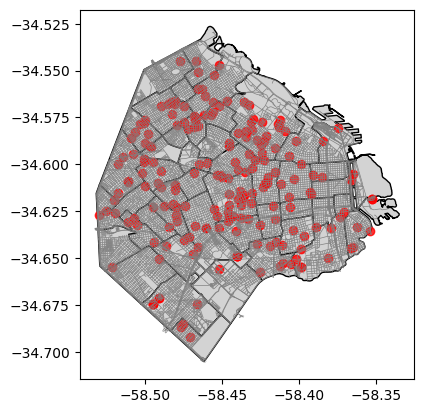

In [100]:
streets.plot(linewidth=0.5, color="grey")
barrios.plot(linewidth=1, color="lightgray", edgecolor="black", ax=plt.gca())
data.sample(200).plot(ax=plt.gca(), color="red", alpha=.8)


# Clustering de contactos

<Axes: >

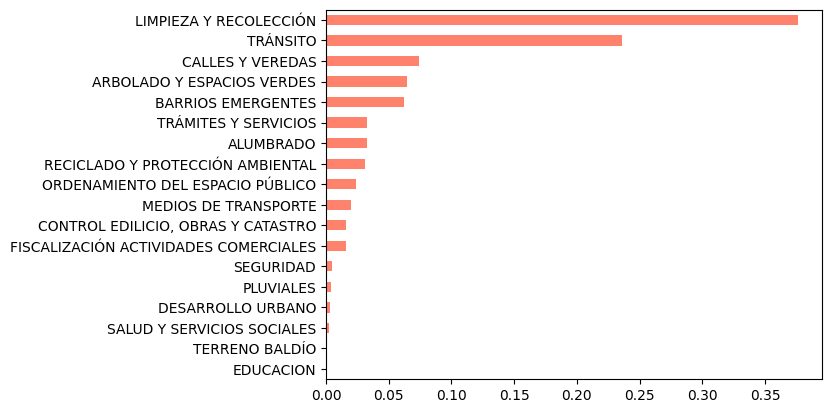

In [65]:
data.categoria.value_counts(normalize=True)\
    .sort_values(ascending=True)\
    .plot(kind="barh", color="tomato", alpha=.8)

In [70]:
data[data.categoria == "DESARROLLO URBANO"].prestacion.value_counts(normalize=True)

MEJORA DE BARRIDO                                         0.772059
REGISTRO DE OBRAS Y CATASTRO                              0.100267
Registro de Obras y Catastro                              0.094586
ÁRBOL CON ENFERMEDADES                                    0.025401
ACCESOS CERRADOS - SUBTE                                  0.003008
IRREGULARIDADES EN LA SEPARACIÓN DE RESIDUOS EN ORIGEN    0.001337
DISPONIBILIDAD DE CAMBIO EN BOLETERÍAS  - SUBTE           0.001337
SISTEMA DE AUDIO EN COCHES Y ESTACIONES - SUBTE           0.001003
INCONVENIENTES CON MASCOTAS EN EL SUBTE                   0.000668
FILTRACIONES - SUBTE                                      0.000334
Name: prestacion, dtype: float64

In [72]:
# agrupar Desarrollo Urbano, Pluviales, Terreno Baldío en OTROS
data.replace({
    "categoria": {
        "DESARROLLO URBANO": "OTROS",
        "PLUVIALES": "OTROS",
        "TERRENO BALDÍO": "OTROS"
    }
}, inplace=True)

# mantengo Seguridad, Educación y Salud porque son categorías relevantes por sí solas

<Axes: >

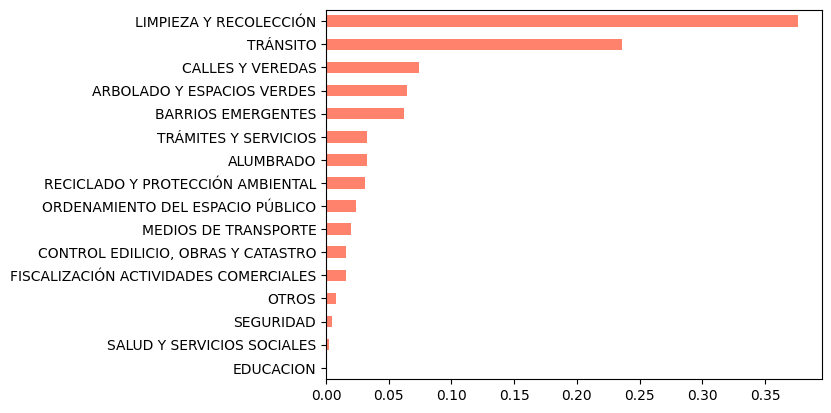

In [74]:
data.categoria.value_counts(normalize=True)\
    .sort_values(ascending=True)\
    .plot(kind="barh", color="tomato", alpha=.8)

In [81]:
data.subcategoria.value_counts(normalize=True)\
    .sort_values(ascending=False)\
    .cumsum()\
    .head(10)

RESIDUOS VOLUMINOSOS                    0.272381
DENUNCIA VIAL                           0.483490
CESTOS Y CONTENEDORES                   0.543491
REPARACIÓN DE VEREDA                    0.595223
LIMPIEZA DE VÍA PÚBLICA                 0.639032
PODA DE ÁRBOL Y DESPEJE DE LUMINARIA    0.672110
REPARACIÓN DE LUMINARIA                 0.696119
DESAGOTE                                0.718472
VEHÍCULOS ABANDONADOS                   0.737976
OCUPACIÓN INDEBIDA                      0.753330
Name: subcategoria, dtype: float64

In [85]:
data.tipo_prestacion.str.upper().value_counts(normalize=True, dropna=False)
data.tipo_prestacion = data.tipo_prestacion.str.upper()

<Axes: ylabel='categoria'>

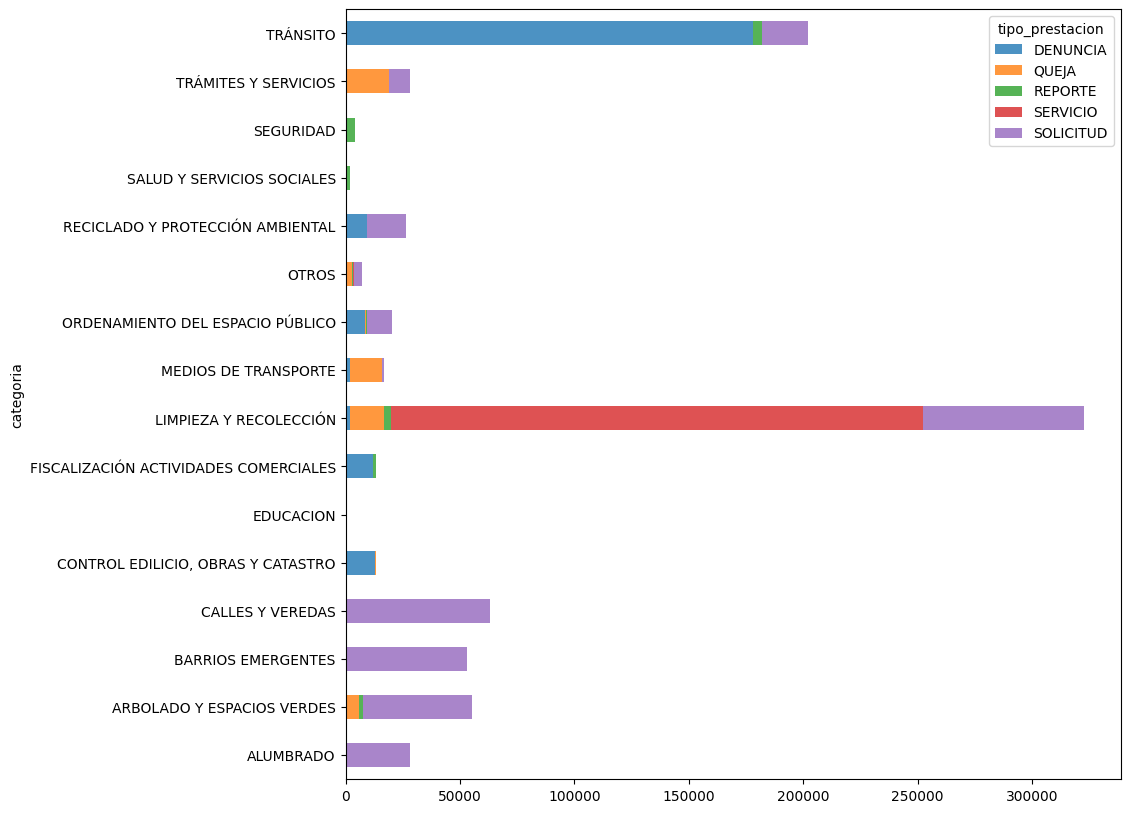

In [86]:
## Is the "tipo_prestacion" feature informative?
data.groupby(["categoria", "tipo_prestacion"])\
    .contacto.size()\
    .unstack()\
    .plot(kind="barh", stacked=True, figsize=(10, 10), alpha=.8)

# no parece haber mucha variacion dentro de cada categoria, no parece ser un feature muy informativo
# pero como si se ve variacion dentro de limpieza y recoleccion y reciclado, vamos a dejarlo

In [88]:
data.domicilio_comuna.value_counts(normalize=True, dropna=False)

12.0    0.099829
11.0    0.098964
15.0    0.081800
13.0    0.079411
10.0    0.074212
7.0     0.071771
14.0    0.070164
9.0     0.063923
4.0     0.057738
8.0     0.056748
6.0     0.053453
1.0     0.050202
5.0     0.044764
3.0     0.043729
2.0     0.029161
NaN     0.024133
Name: domicilio_comuna, dtype: float64

In [90]:
comunas.COMUNAS = comunas.COMUNAS.astype(int)

In [106]:
data.lat.isnull().value_counts(normalize=True), data.lon.isnull().value_counts(normalize=True)
data.dropna(subset=["lat", "lon"], inplace=True) # removing 2% null values

In [107]:
def get_comuna(geometry):
    """
    Get comuna from point
    """
    return comunas[comunas.geometry.contains(geometry)].COMUNAS.values[0]


data["comuna_adj"] = data.geometry.apply(get_comuna)
data["comuna_adj"].value_counts(normalize=True, dropna=False)

12    0.102297
11    0.101406
15    0.083823
13    0.081374
10    0.076047
7     0.073546
14    0.071899
9     0.065503
4     0.059154
8     0.058163
6     0.054780
1     0.051444
5     0.045871
3     0.044811
2     0.029882
Name: comuna_adj, dtype: float64

In [109]:
(data["comuna_adj"] == data["domicilio_comuna"]).value_counts() ## comunas check

True     838493
False        14
dtype: int64

In [111]:
data = data[data.comuna_adj == data.domicilio_comuna] # removing misassigned comunas

In [112]:
import os 
if not os.path.exists("data/processed"):
    os.makedirs("data/processed")

data.to_csv("./data/processed/backup-2021-suac-data.csv", index=False)

In [116]:
pd.set_option("display.max_columns", 100)

In [117]:
data.contacto.duplicated().any() # there are duplicated contacts
data[data.contacto.duplicated(keep=False)].sort_values(by="contacto").head(10)

contacto  periodo                         categoria  \
90425   00000001/21   202101  RECICLADO Y PROTECCIÓN AMBIENTAL   
245522  00000001/21   202101  RECICLADO Y PROTECCIÓN AMBIENTAL   
85811   00000002/21   202101            LIMPIEZA Y RECOLECCIÓN   
240908  00000002/21   202101            LIMPIEZA Y RECOLECCIÓN   
240853  00000003/21   202101            LIMPIEZA Y RECOLECCIÓN   
85756   00000003/21   202101            LIMPIEZA Y RECOLECCIÓN   
85606   00000004/21   202101        ARBOLADO Y ESPACIOS VERDES   
240703  00000004/21   202101        ARBOLADO Y ESPACIOS VERDES   
240687  00000005/21   202101            LIMPIEZA Y RECOLECCIÓN   
85590   00000005/21   202101            LIMPIEZA Y RECOLECCIÓN   

                                   subcategoria  \
90425   RUIDOS MOLESTOS, EMANACIONES O DERRAMES   
245522  RUIDOS MOLESTOS, EMANACIONES O DERRAMES   
85811                      RESIDUOS VOLUMINOSOS   
240908                     RESIDUOS VOLUMINOSOS   
240853                     RESIDUOS VOLUMINOSOS   
85756                      RESIDUOS VOLUMINOSOS   
85606      PODA DE ÁRBOL Y DESPEJE DE LUMINARIA   
240703     PODA DE ÁRBOL Y DESPEJE DE LUMINARIA   
240687                  LIMPIEZA DE VÍA PÚBLICA   
85590                   LIMPIEZA DE VÍA PÚBLICA   

                                               prestacion tipo_prestacion  \
90425                       RUIDOS MOLESTOS Y VIBRACIONES        DENUNCIA   
245522                      RUIDOS MOLESTOS Y VIBRACIONES        DENUNCIA   
85811   RETIRO DE RESIDUOS VOLUMINOSOS (MUEBLES Y ELEC...        SERVICIO   
240908  RETIRO DE RESIDUOS VOLUMINOSOS (MUEBLES Y ELEC...        SERVICIO   
240853               RETIRO DE ESCOMBROS / RESTOS DE OBRA        SERVICIO   
85756                RETIRO DE ESCOMBROS / RESTOS DE OBRA        SERVICIO   
85606       PODA DE ÁRBOL/DESPEJE DE LUMINARIA O SEMÁFORO       SOLICITUD   
240703      PODA DE ÁRBOL/DESPEJE DE LUMINARIA O SEMÁFORO       SOLICITUD   
240687       RECOLECCIÓN DE RESIDUOS FUERA DEL CONTENEDOR       SOLICITUD   
85590        RECOLECCIÓN DE RESIDUOS FUERA DEL CONTENEDOR       SOLICITUD   

       fecha_ingreso hora_ingreso  domicilio_comuna domicilio_barrio  \
90425     2021-01-01     00:33:01               5.0          Almagro   
245522    2021-01-01     00:33:01               5.0          Almagro   
85811     2021-01-01     00:59:54               7.0           Flores   
240908    2021-01-01     00:59:54               7.0           Flores   
240853    2021-01-01     01:04:29               7.0           Flores   
85756     2021-01-01     01:04:29               7.0           Flores   
85606     2021-01-01     01:07:37               9.0          Liniers   
240703    2021-01-01     01:07:37               9.0          Liniers   
240687    2021-01-01     01:08:03               7.0           Flores   
85590     2021-01-01     01:08:03               7.0           Flores   

            domiclio_calle  domicilio_altura domicilio_esquina_proxima  \
90425   BOCAYUVA, QUINTINO             550.0                       NaN   
245522  BOCAYUVA, QUINTINO             550.0                       NaN   
85811           MEMBRILLAR             364.0                       NaN   
240908          MEMBRILLAR             364.0                       NaN   
240853          MEMBRILLAR             364.0                       NaN   
85756           MEMBRILLAR             364.0                       NaN   
85606               CARHUE               NaN                  BOQUERON   
240703              CARHUE               NaN                  BOQUERON   
240687          MEMBRILLAR             364.0                       NaN   
85590           MEMBRILLAR             364.0                       NaN   

              lat        lon       canal     genero estado_del_contacto  \
90425  -34.618429 -58.422465  App BA 147  Masculino             Cerrado   
245522 -34.618429 -58.422465  App BA 147  Masculino             Cerrado   
85811  -34.632548 -58.459178     GCS Web 

In [119]:
# it seems these are all row-wise duplicates
data.drop_duplicates(inplace=True)
data.contacto.duplicated().any() # contactos are now unique identifiers

/tmp/ipykernel_63074/2081231870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


False

In [135]:
parse_alturas = lambda n: n if n > 0 else np.nan
data.domicilio_altura = data.domicilio_altura.apply(parse_alturas)
print(data.domicilio_altura.isnull().value_counts(normalize=True))

False    0.866841
True     0.133159
Name: domicilio_altura, dtype: float64


/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [140]:
data.hora_ingreso = pd.to_datetime(data.hora_ingreso.apply(lambda s: s.replace("AM", "").replace("PM", "").strip()), format="%H:%M:%S")

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [144]:
data.hora_ingreso = data.hora_ingreso.apply(lambda d: d.strftime("%H:%M:%S"))

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [145]:
data.sample()

contacto  periodo         categoria          subcategoria  \
730804  00577042/21   202112  CALLES Y VEREDAS  REPARACIÓN DE VEREDA   

                                               prestacion tipo_prestacion  \
730804  Reparación de vereda rota por empresa de servicio       SOLICITUD   

       fecha_ingreso hora_ingreso  domicilio_comuna domicilio_barrio  \
730804    2021-12-16     17:49:28               3.0        Balvanera   

       domiclio_calle  domicilio_altura domicilio_esquina_proxima        lat  \
730804            NaN            2578.0                       NaN -34.610031   

              lon       canal     genero estado_del_contacto  \
730804 -58.402967  App BA 147  Masculino             Abierto   

       fecha_cierre_contacto domicilio_calle                     geometry  \
730804                   NaN   RIVADAVIA AV.  POINT (-58.40297 -34.61003)   

        comuna_adj  
730804           3

# Analisis on Comuna 4

In [146]:
data_c4 = data[data.comuna_adj == 4]
data_c4.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 41211 entries, 14 to 104908
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   contacto                   41211 non-null  object        
 1   periodo                    41211 non-null  int64         
 2   categoria                  41054 non-null  object        
 3   subcategoria               40948 non-null  object        
 4   prestacion                 41058 non-null  object        
 5   tipo_prestacion            41058 non-null  object        
 6   fecha_ingreso              41211 non-null  datetime64[ns]
 7   hora_ingreso               41211 non-null  object        
 8   domicilio_comuna           41211 non-null  float64       
 9   domicilio_barrio           41211 non-null  object        
 10  domiclio_calle             13729 non-null  object        
 11  domicilio_altura           27451 non-null  float64       

In [147]:
data_c4.sample(4)

contacto  periodo                         categoria  \
127928  00044095/21   202101              MEDIOS DE TRANSPORTE   
455066  00296593/21   202107                BARRIOS EMERGENTES   
232739  00146358/21   202103  ORDENAMIENTO DEL ESPACIO PÚBLICO   
713431  00559807/21   202112        ARBOLADO Y ESPACIOS VERDES   

                                subcategoria  \
127928                                SUBTES   
455066                              DESAGOTE   
232739                    OCUPACIÓN INDEBIDA   
713431  PODA DE ÁRBOL Y DESPEJE DE LUMINARIA   

                                           prestacion tipo_prestacion  \
127928                              MEJORA DE BARRIDO           QUEJA   
455066           Desagote de pozo ciego (atmosférico)       SOLICITUD   
232739                        DESOBSTRUCCIÓN (VACTOR)       SOLICITUD   
713431  Poda de árbol/despeje de luminaria o semáforo       SOLICITUD   

       fecha_ingreso hora_ingreso  domicilio_comuna domicilio_barrio  \
127928    2021-01-29     12:59:40               4.0    Nueva Pompeya   
455066    2021-07-08     00:32:30               4.0         Barracas   
232739    2021-03-27     02:51:18               4.0         Barracas   
713431    2021-12-07     13:02:21               4.0         Barracas   

       domiclio_calle  domicilio_altura domicilio_esquina_proxima        lat  \
127928         RAULET             231.0                       NaN -34.642023   
455066            NaN               NaN                       NaN -34.650617   
232739            NaN               NaN                       NaN -34.654819   
713431            NaN             475.0                       NaN -34.629203   

              lon          canal     genero estado_del_contacto  \
127928 -58.416366    Call Center   Femenino             Cerrado   
455066 -58.402941  Operador UGIS        NaN             Abierto   
232739 -58.398481  Operador UGIS        NaN             Cerrado   
713431 -58.371631        GCS Web  Masculino             Cerrado   

       fecha_cierre_contacto domicilio_calle                     geometry  \
127928   30/01/2021 18:31:58             NaN  POINT (-58.41637 -34.64202)   
455066                   NaN             NaN  POINT (-58.40294 -34.65062)   
232739   29/03/2021 21:24:49             NaN  POINT (-58.39848 -34.65482)   
713431            2021-12-10       USPALLATA  POINT (-58.37163 -34.62920)   

        comuna_adj  
127928           4  
455066           4  
232739           4  
713431           4

In [151]:
## correct mis assigned contactos, these are only 12 rows
data_c4[data_c4.domicilio_barrio.isin(["Villa Soldati", "San Telmo", "Constitucion"])]
data_c4 = data_c4[~data_c4.domicilio_barrio.isin(["Villa Soldati", "San Telmo", "Constitucion"])]

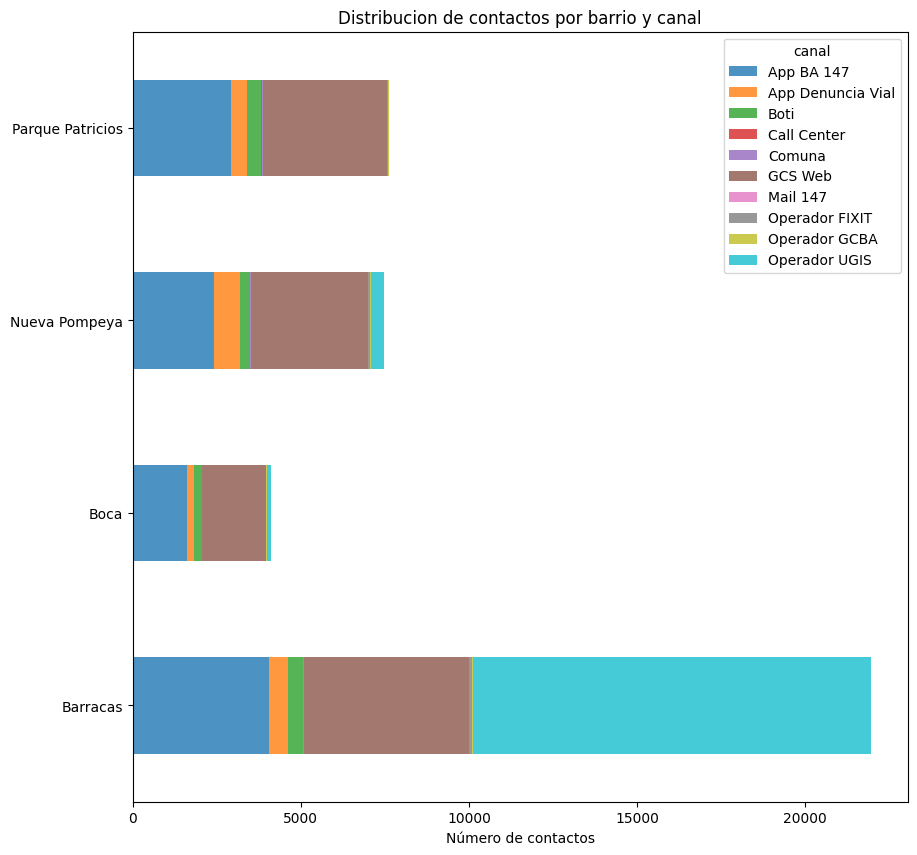

In [154]:
data_c4.groupby(["domicilio_barrio", "canal"])\
    .contacto.size()\
    .unstack()\
    .plot(kind="barh", stacked=True, figsize=(10, 10), alpha=.8)

plt.xlabel("Número de contactos")
plt.ylabel("")
plt.title("Distribucion de contactos por barrio y canal")
plt.savefig("./visuals/2021/distribucion-contactos-barrio-canal.png", bbox_inches="tight")

In [155]:
data.genero.value_counts(normalize=True, dropna=False)

Masculino    0.487658
Femenino     0.422800
NaN          0.088387
Otros        0.001155
Name: genero, dtype: float64

<Axes: >

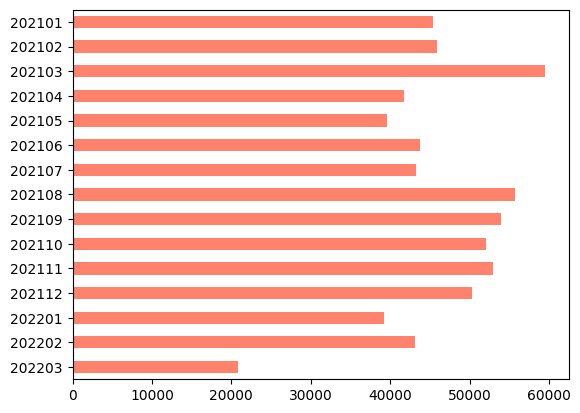

In [158]:
data.periodo.value_counts(dropna=False).sort_index(ascending=False).plot(kind="barh", color="tomato", alpha=.8)

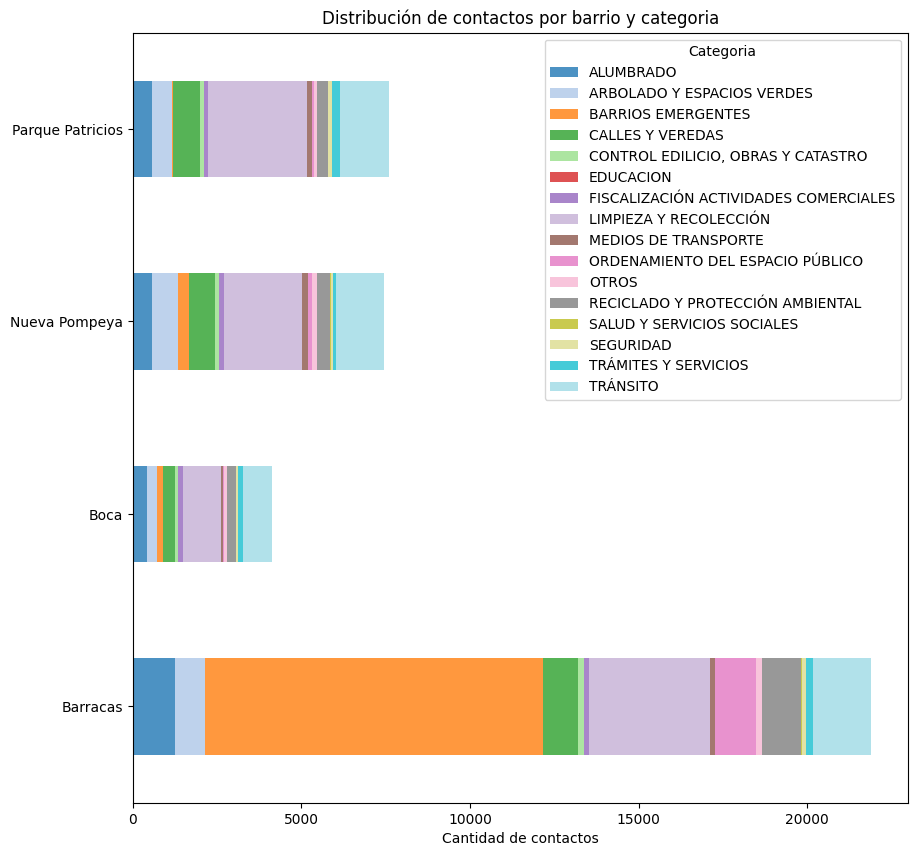

In [162]:
data_c4.groupby(["domicilio_barrio", "categoria"])\
    .contacto.size()\
    .unstack()\
    .plot(kind="barh", stacked=True, figsize=(10, 10), alpha=.8, colormap="tab20")


plt.legend(title="Categoria")
plt.title("Distribución de contactos por barrio y categoria")
plt.xlabel("Cantidad de contactos")
plt.ylabel("")
plt.savefig("./visuals/2021/distribucion-contactos-barrio-categoria.png", bbox_inches="tight")

In [169]:
priorities = data_c4.groupby(["domicilio_barrio", "categoria"])\
    .contacto.size().sort_values(ascending=False)\
    .to_frame().head(10).reset_index()\
    [["domicilio_barrio", "categoria"]].values

priorities

array([['Barracas', 'BARRIOS EMERGENTES'],
       ['Barracas', 'LIMPIEZA Y RECOLECCIÓN'],
       ['Parque Patricios', 'LIMPIEZA Y RECOLECCIÓN'],
       ['Nueva Pompeya', 'LIMPIEZA Y RECOLECCIÓN'],
       ['Barracas', 'TRÁNSITO'],
       ['Parque Patricios', 'TRÁNSITO'],
       ['Nueva Pompeya', 'TRÁNSITO'],
       ['Barracas', 'ALUMBRADO'],
       ['Barracas', 'ORDENAMIENTO DEL ESPACIO PÚBLICO'],
       ['Barracas', 'RECICLADO Y PROTECCIÓN AMBIENTAL']], dtype=object)

Barracas - BARRIOS EMERGENTES
Barracas - LIMPIEZA Y RECOLECCIÓN
Parque Patricios - LIMPIEZA Y RECOLECCIÓN
Nueva Pompeya - LIMPIEZA Y RECOLECCIÓN
Barracas - TRÁNSITO
Parque Patricios - TRÁNSITO
Nueva Pompeya - TRÁNSITO
Barracas - ALUMBRADO
Barracas - ORDENAMIENTO DEL ESPACIO PÚBLICO
Barracas - RECICLADO Y PROTECCIÓN AMBIENTAL


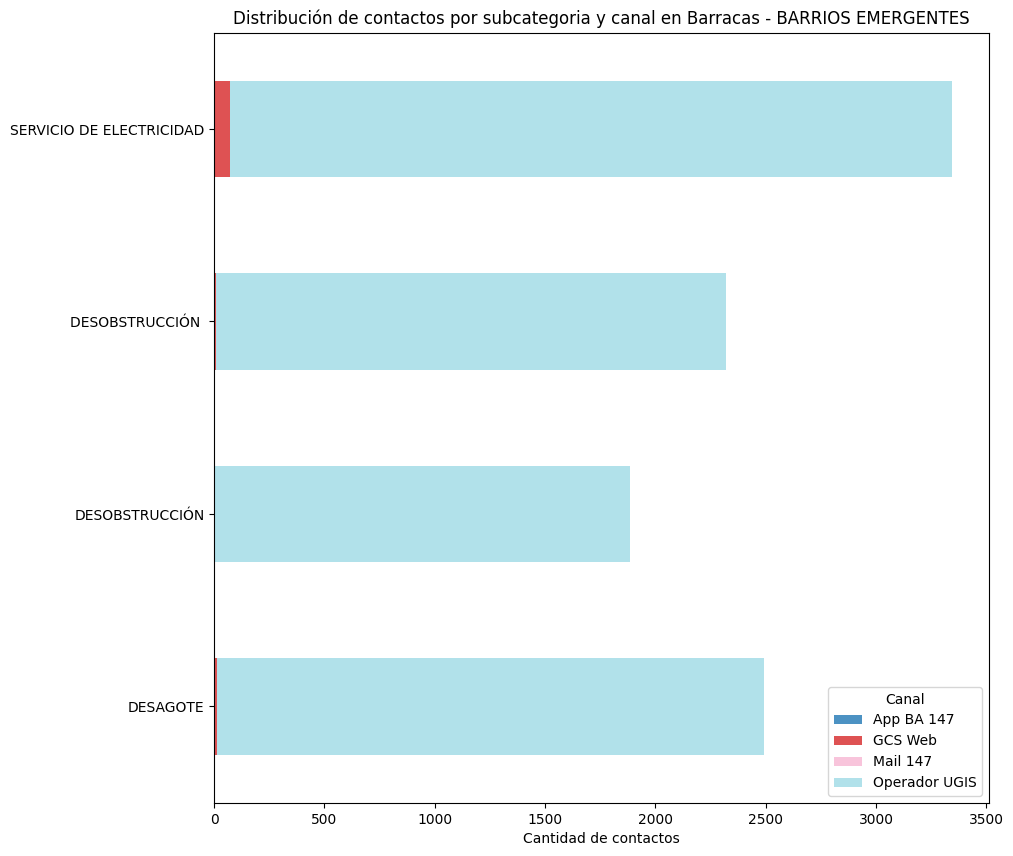

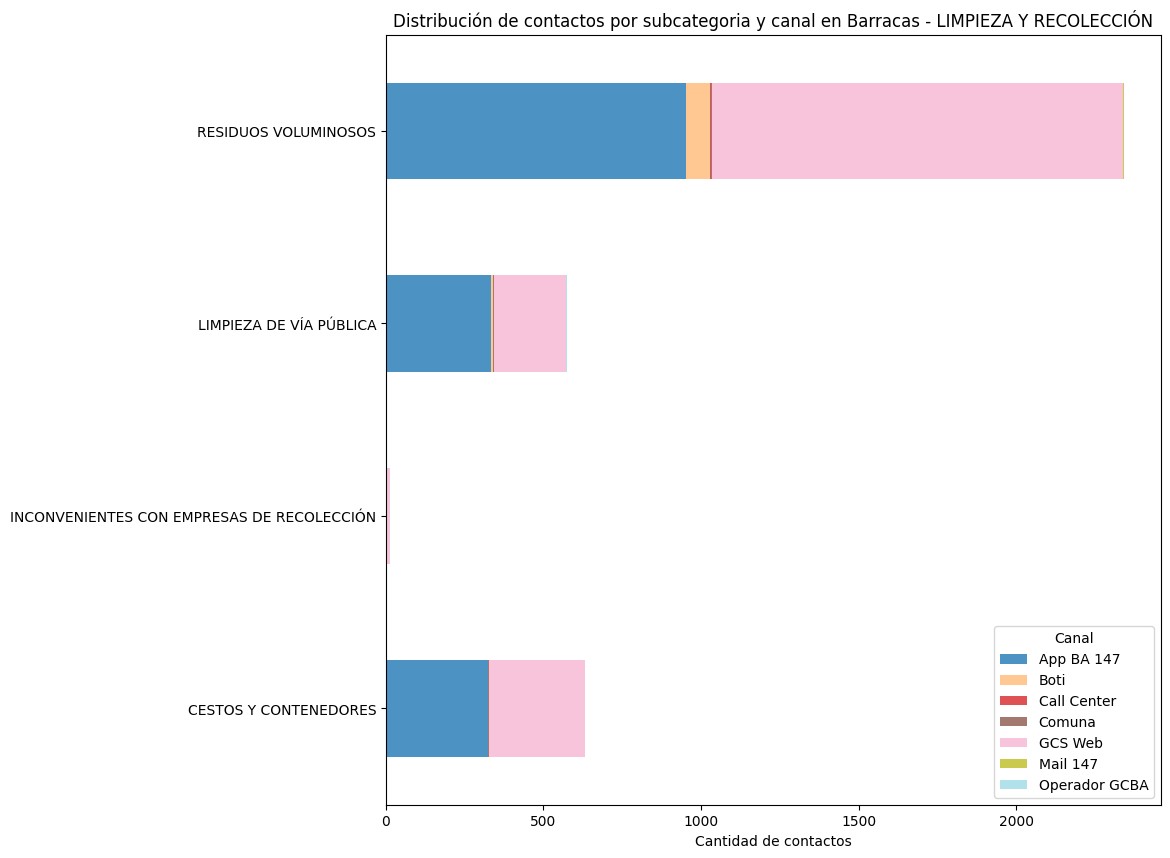

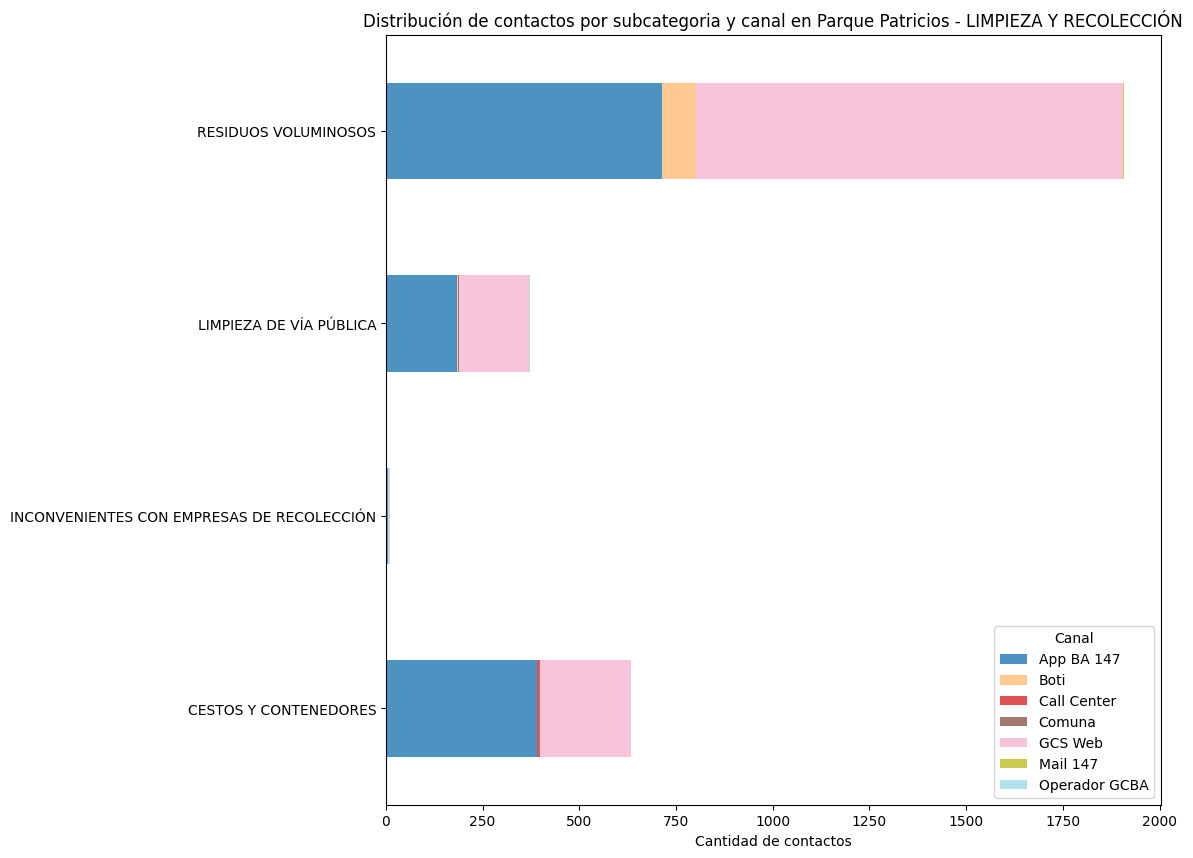

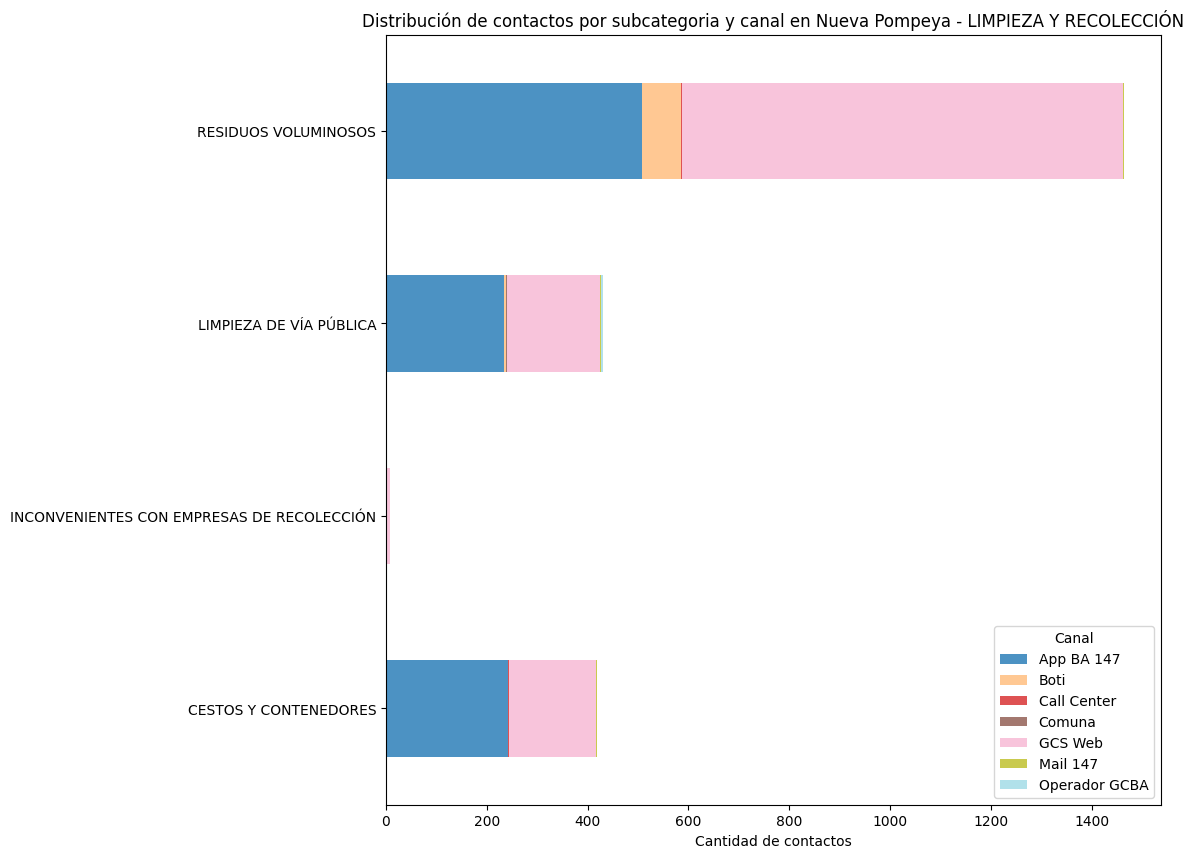

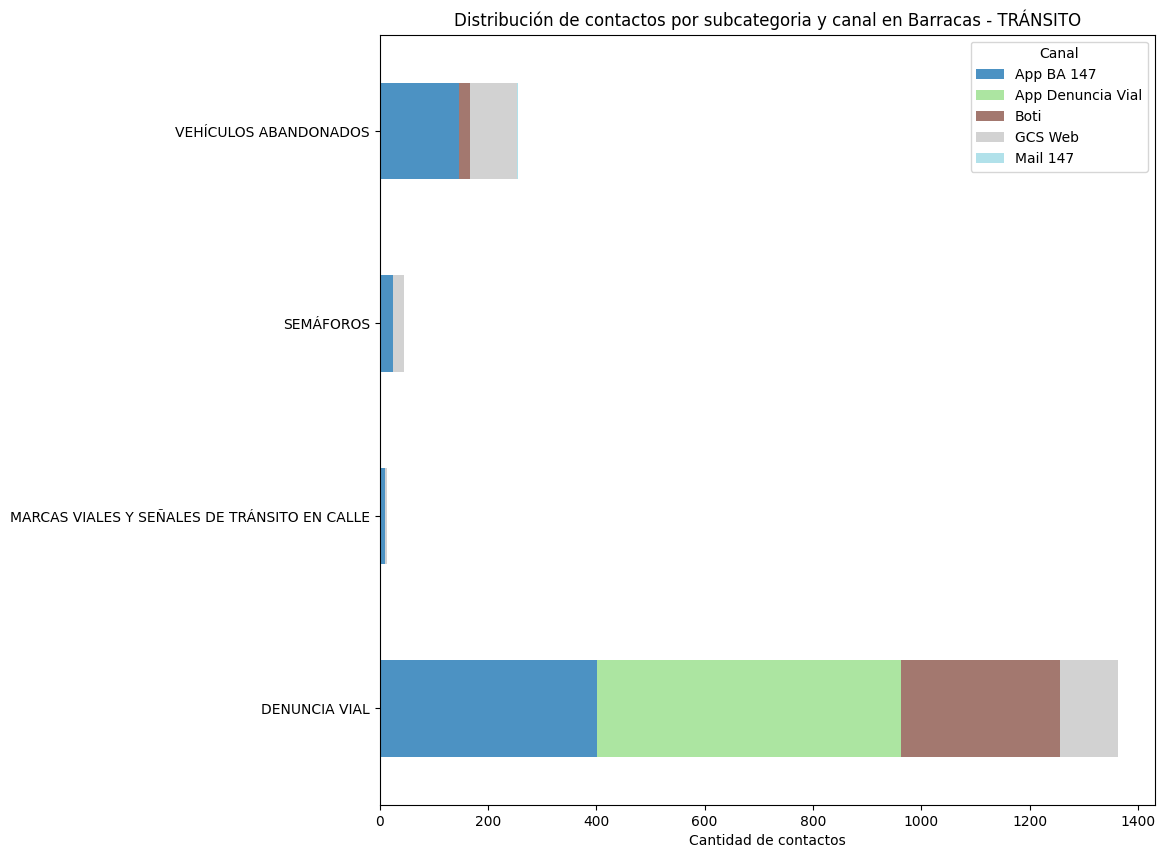

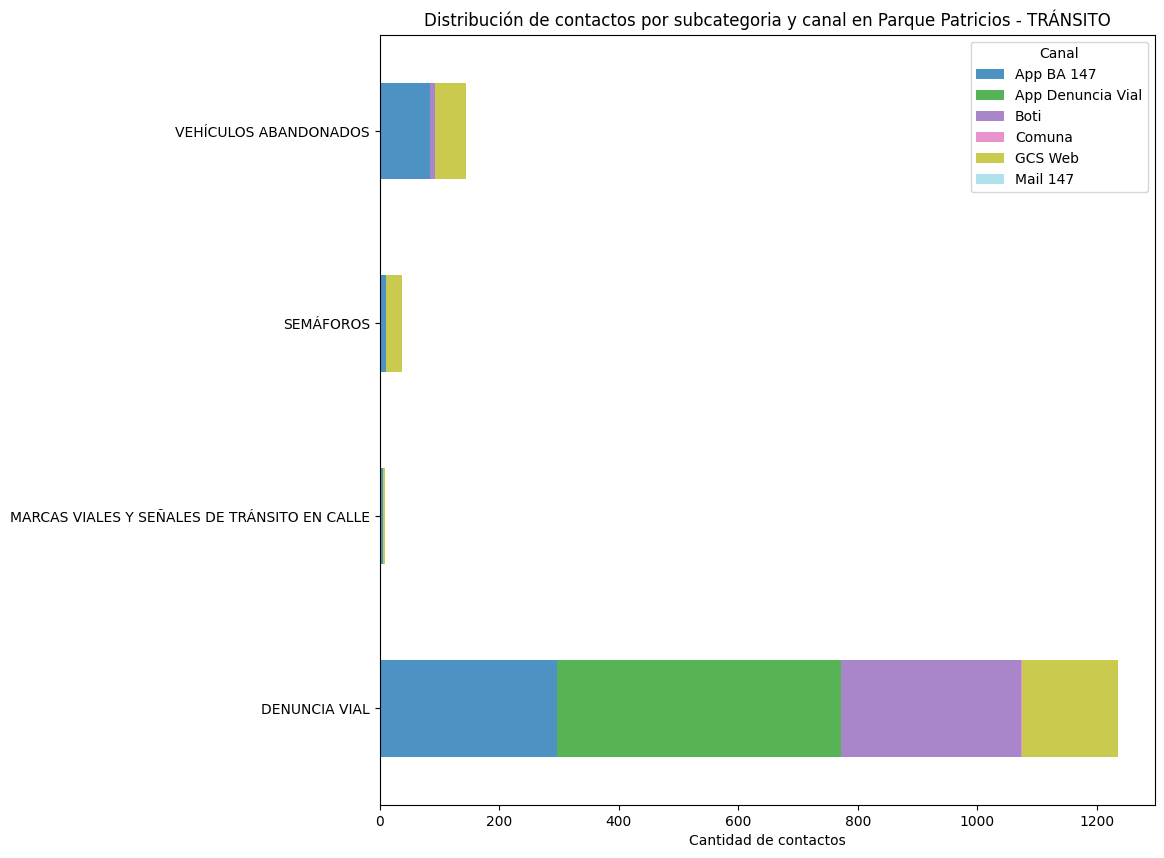

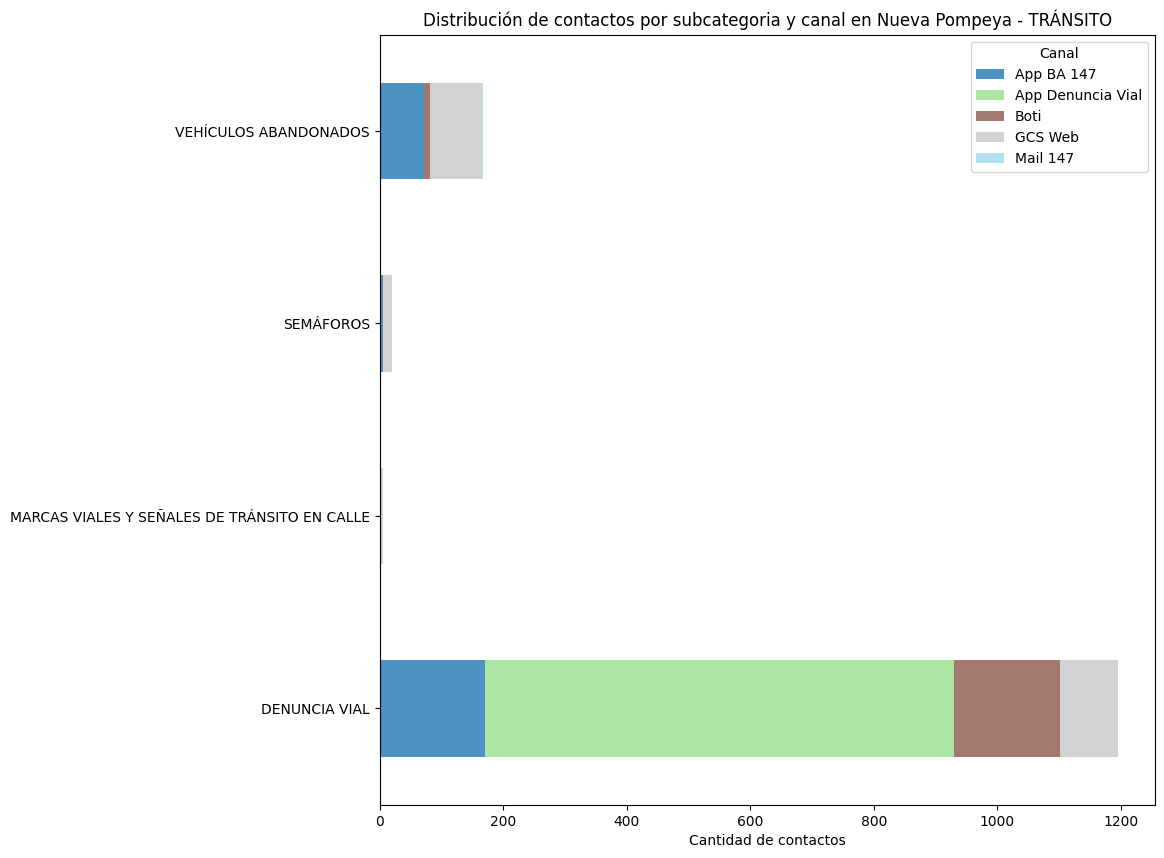

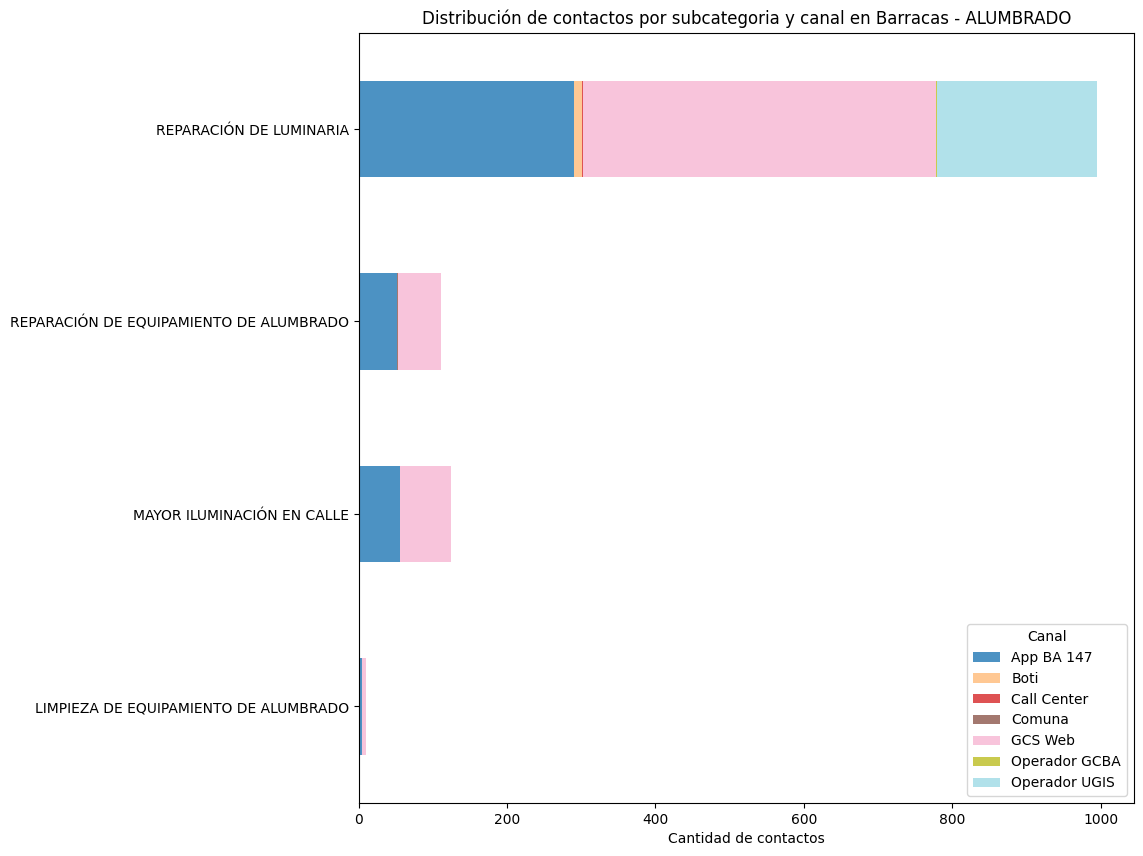

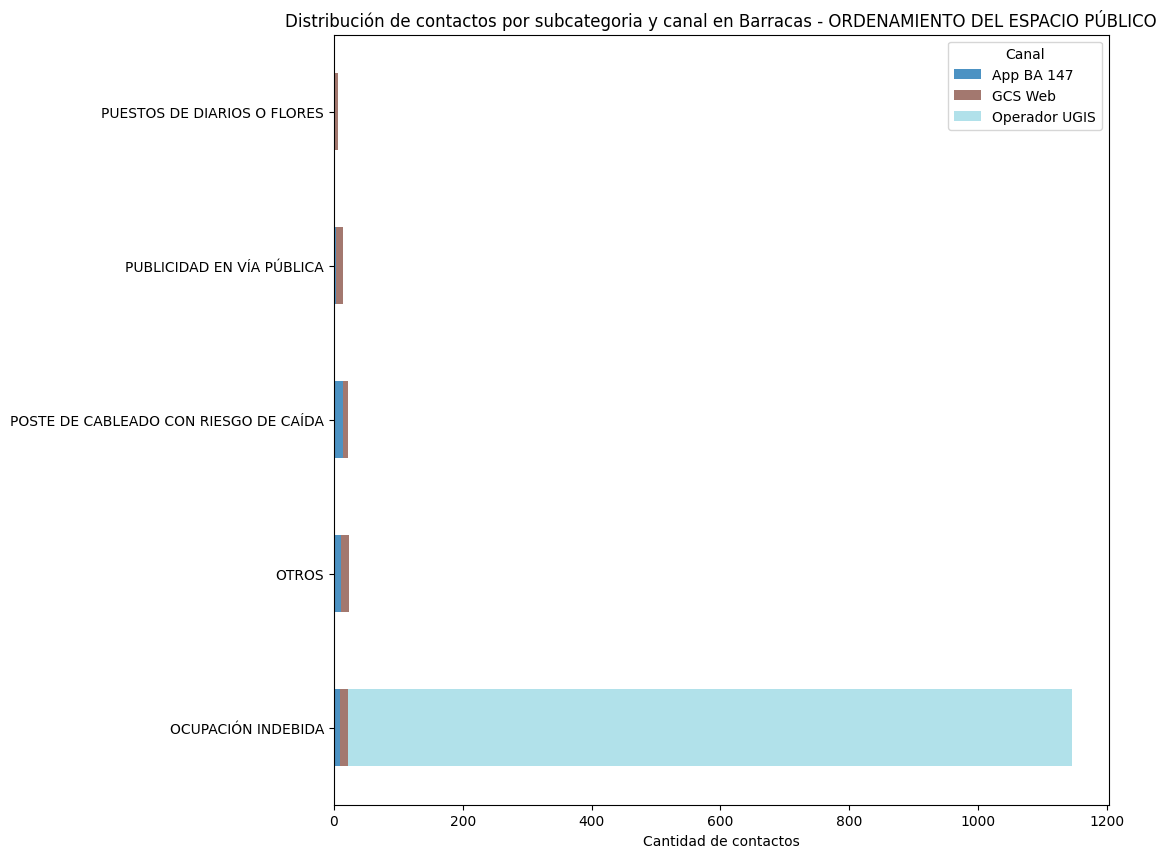

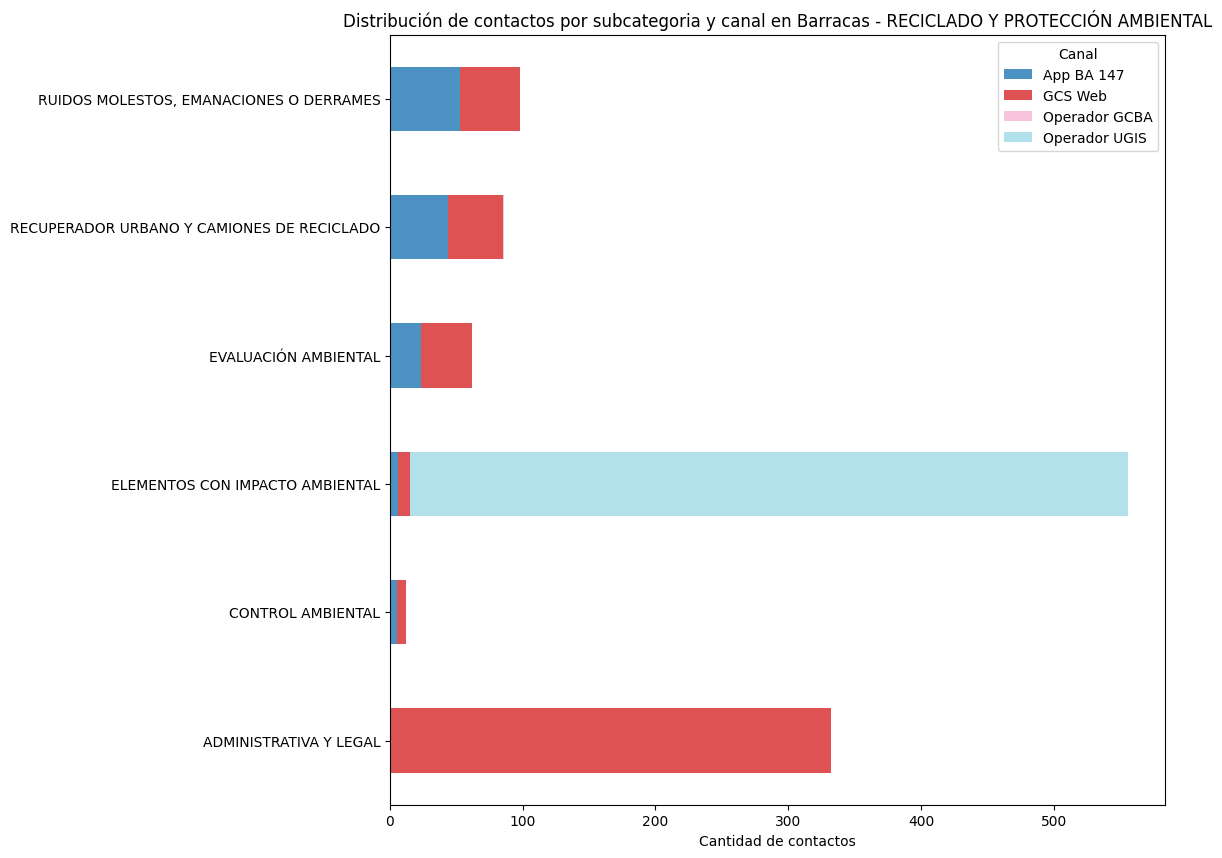

In [173]:
for barrio, categoria in priorities:
    print(barrio, "-", categoria)

    data_c4.loc[(data_c4.domicilio_barrio == barrio) & (data_c4.categoria == categoria)]\
        .groupby(["subcategoria", "canal"])\
        .contacto.size()\
        .unstack()\
        .plot(kind="barh", stacked=True, figsize=(10, 10), alpha=.8, colormap="tab20")
    
    plt.legend(title="Canal")
    plt.title(f"Distribución de contactos por subcategoria y canal en {barrio} - {categoria}")
    plt.xlabel("Cantidad de contactos")
    plt.ylabel("")
    plt.savefig(f"./visuals/2021/distribucion-contactos-subcategoria-canal-{barrio}-{categoria}.png", bbox_inches="tight")


Barracas - BARRIOS EMERGENTES
Barracas - LIMPIEZA Y RECOLECCIÓN
Parque Patricios - LIMPIEZA Y RECOLECCIÓN
Nueva Pompeya - LIMPIEZA Y RECOLECCIÓN
Barracas - TRÁNSITO
Parque Patricios - TRÁNSITO
Nueva Pompeya - TRÁNSITO
Barracas - ALUMBRADO
Barracas - ORDENAMIENTO DEL ESPACIO PÚBLICO
Barracas - RECICLADO Y PROTECCIÓN AMBIENTAL


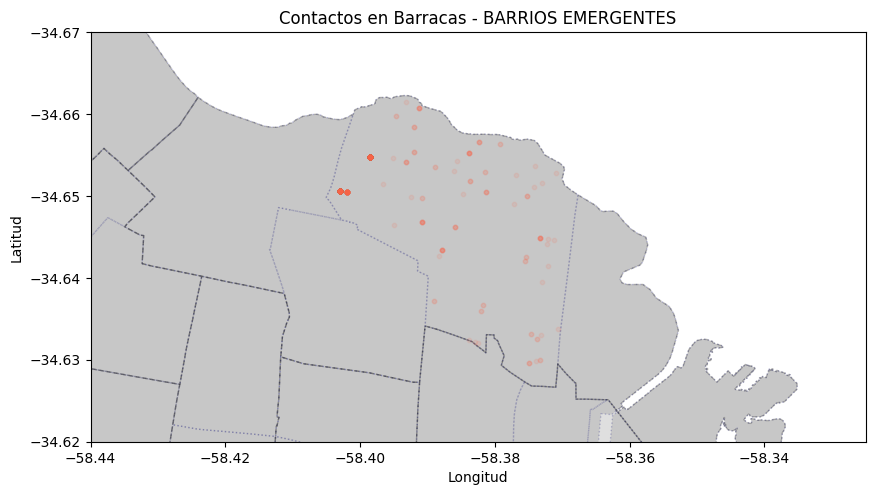

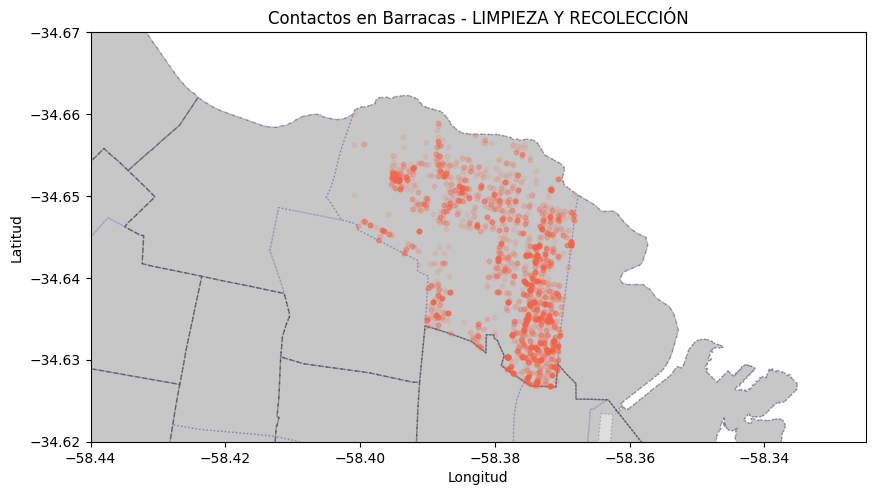

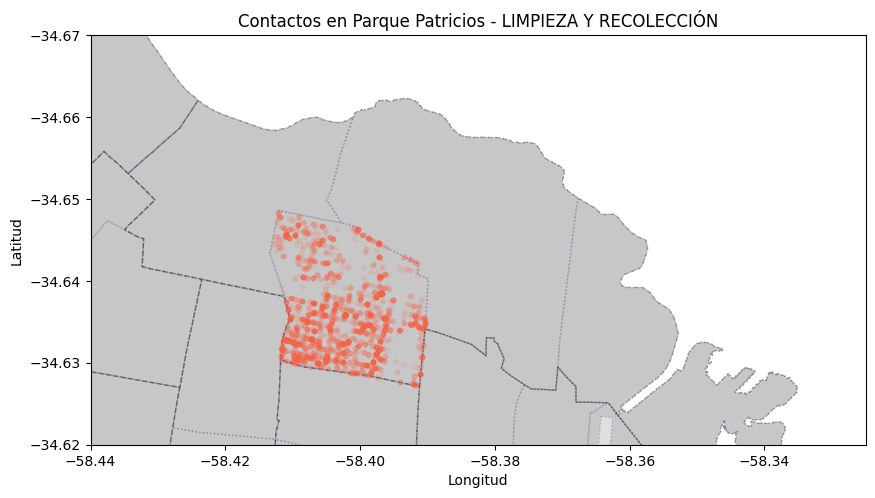

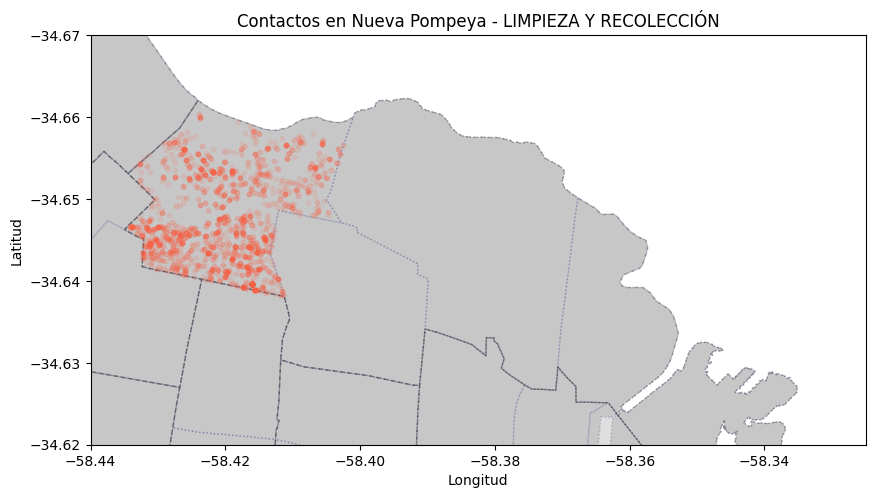

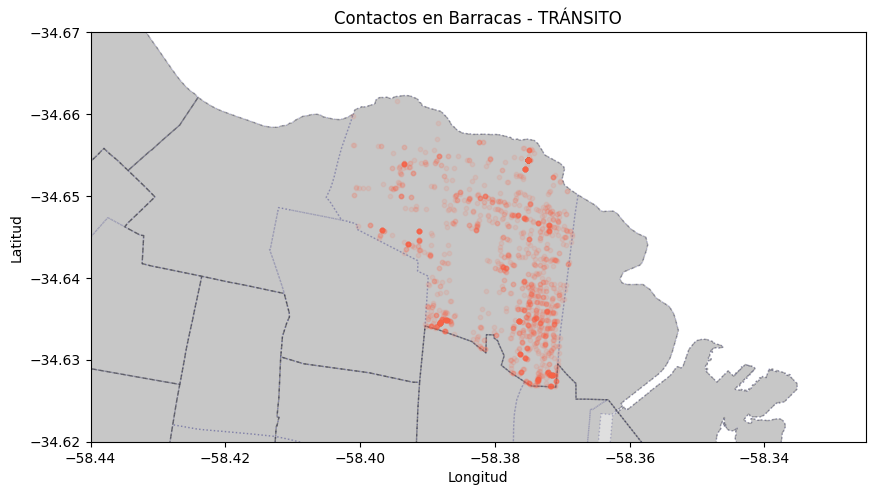

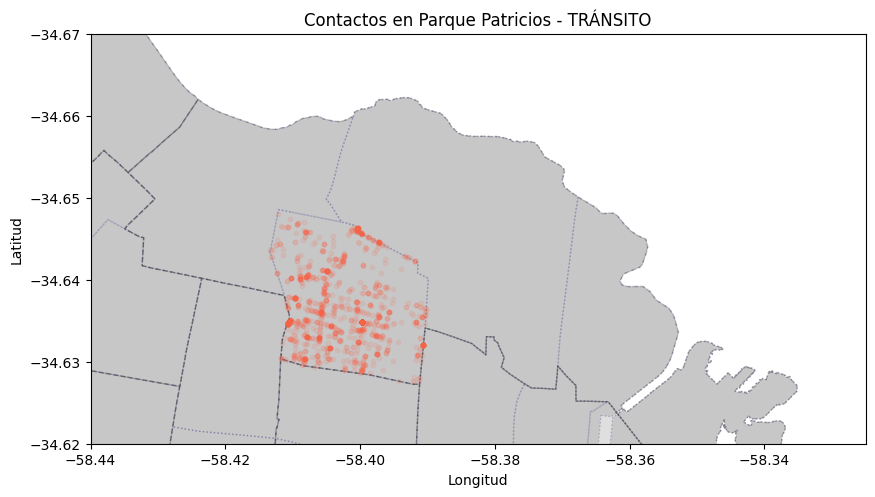

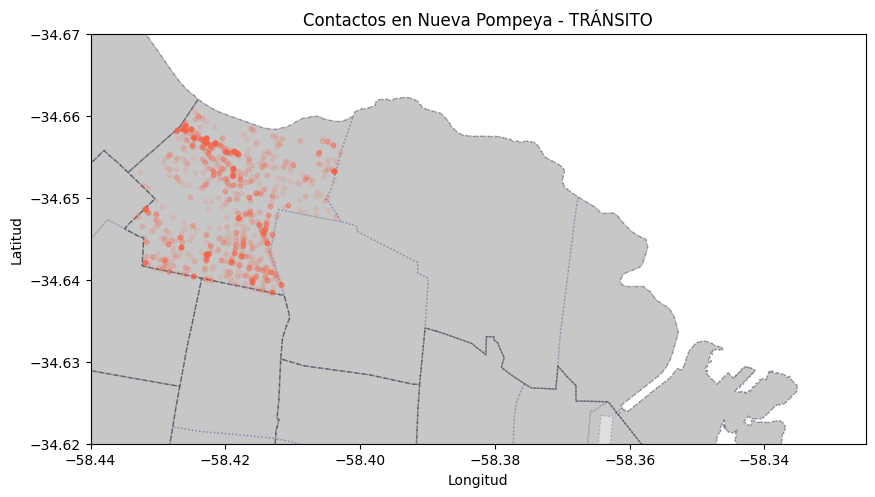

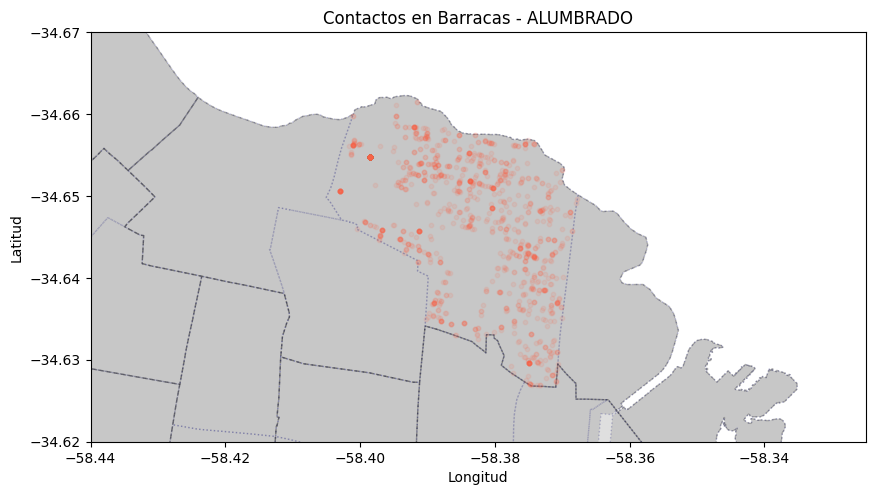

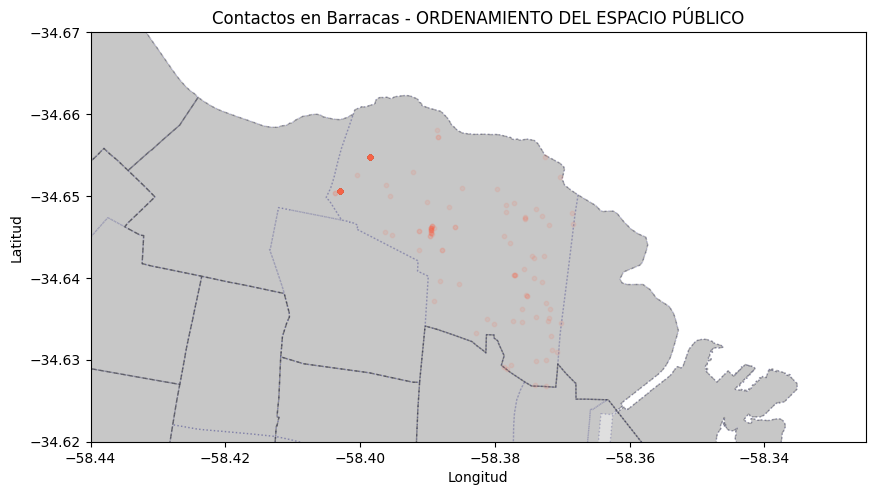

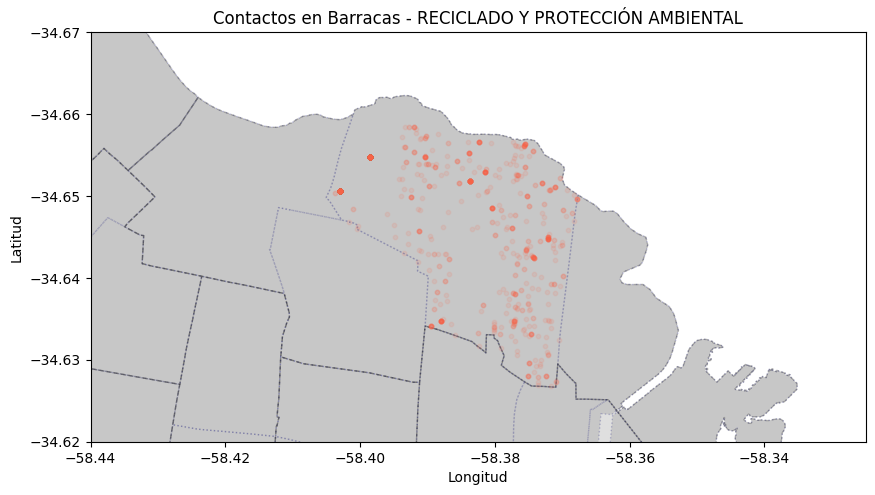

In [191]:
COMUNA4_BBOX = {
    "x": (-58.44, -58.325),
    "y": (-34.62, -34.67)
}

# plot map plots for each prioritary barrio-category
for barrio, categoria in priorities:
    print(barrio, "-", categoria)

    fig, ax = plt.subplots(1,1, figsize=(10,10))
        
    barrios.plot(ax=ax, alpha=.25, color="grey", edgecolor="navy", linewidth=1, linestyle="dotted")
    comunas.plot(ax=ax, alpha=.25, color="grey", edgecolor="black", linewidth=1, linestyle="--")
    data_c4.loc[(data_c4.domicilio_barrio == barrio) & (data_c4.categoria == categoria)]\
        .plot(figsize=(10, 10), alpha=.1, color="tomato", markersize=10, ax=ax)
    
    plt.xlim(COMUNA4_BBOX["x"])
    plt.ylim(COMUNA4_BBOX["y"])

    plt.title(f"Contactos en {barrio} - {categoria}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.savefig(f"./visuals/2021/contactos-{barrio}-{categoria}.png", bbox_inches="tight")
    

Barracas - BARRIOS EMERGENTES
Barracas - LIMPIEZA Y RECOLECCIÓN
Parque Patricios - LIMPIEZA Y RECOLECCIÓN
Nueva Pompeya - LIMPIEZA Y RECOLECCIÓN
Barracas - TRÁNSITO
Parque Patricios - TRÁNSITO
Nueva Pompeya - TRÁNSITO
Barracas - ALUMBRADO
Barracas - ORDENAMIENTO DEL ESPACIO PÚBLICO
Barracas - RECICLADO Y PROTECCIÓN AMBIENTAL


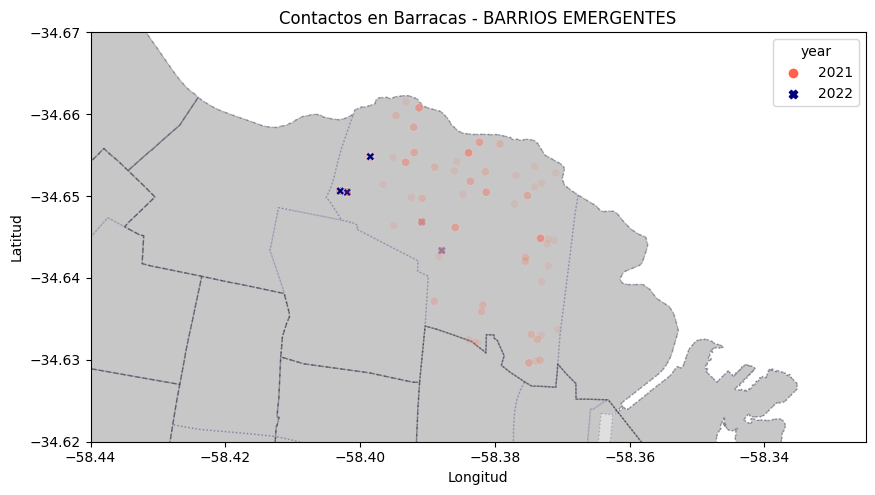

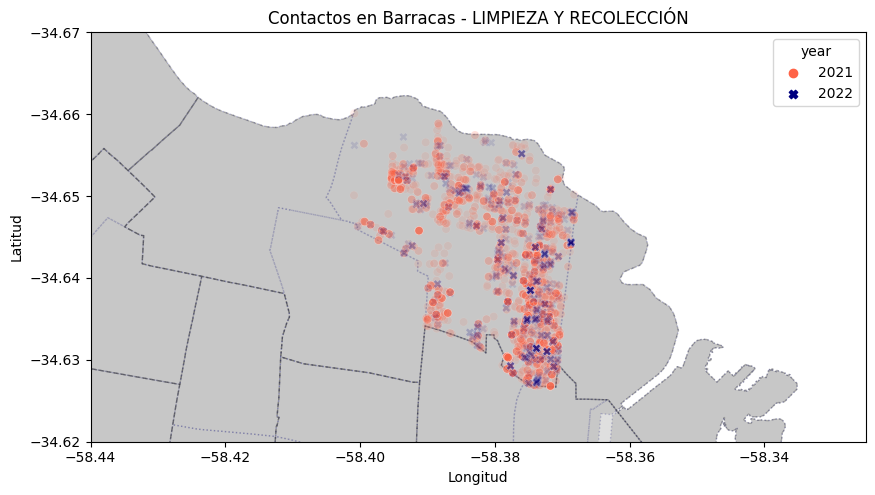

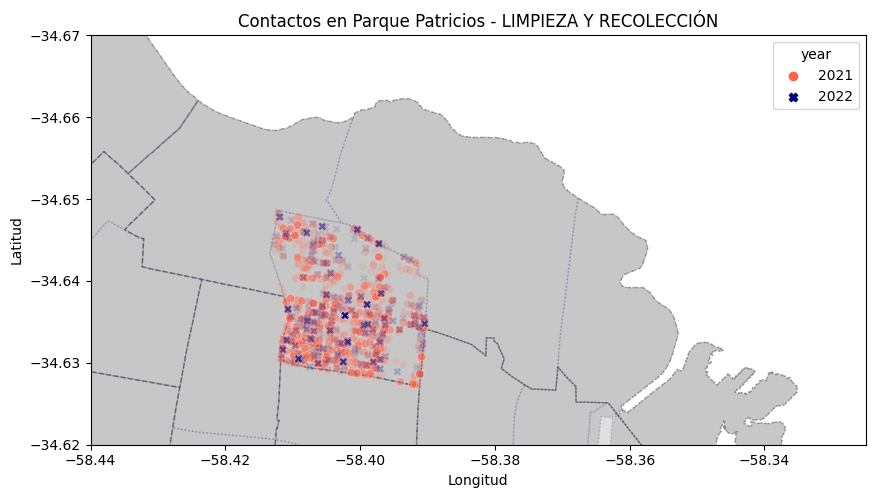

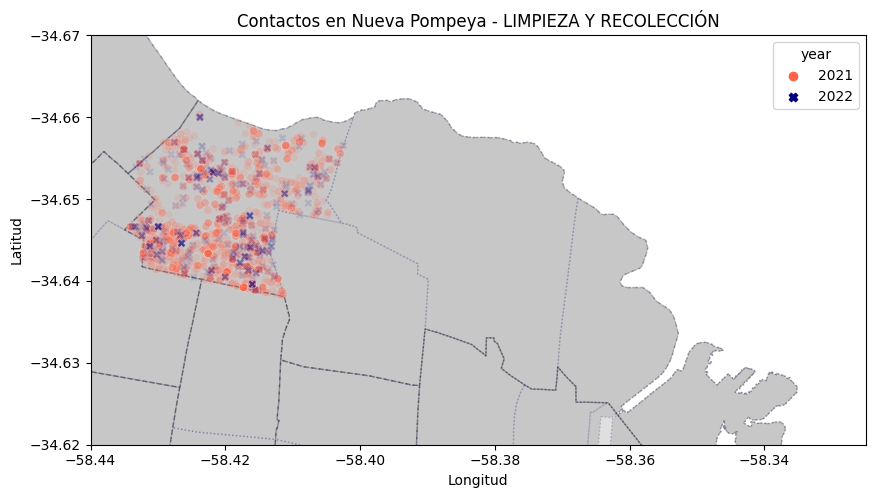

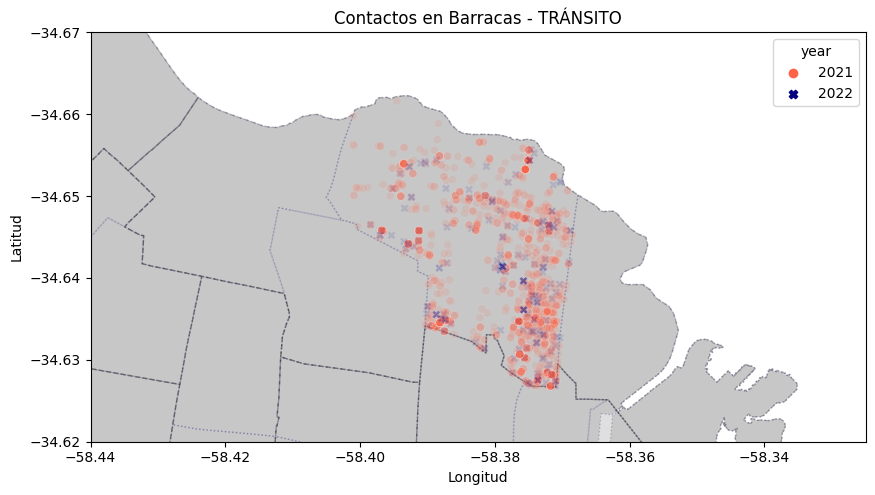

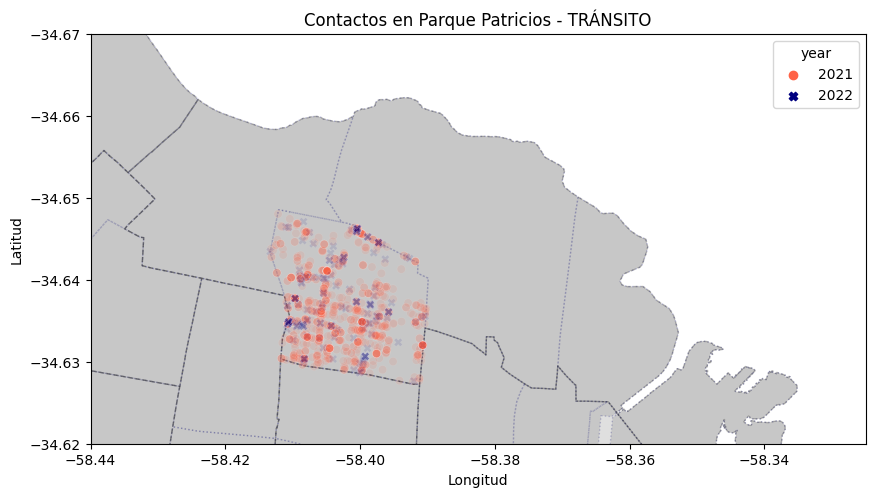

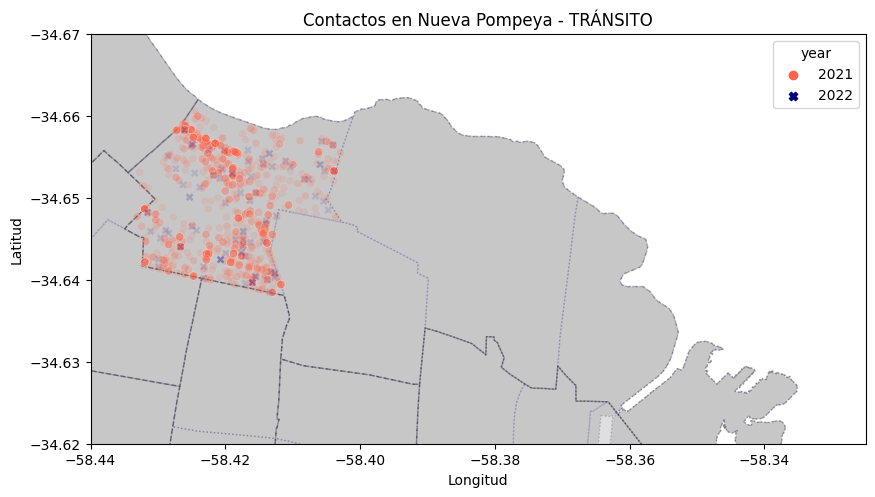

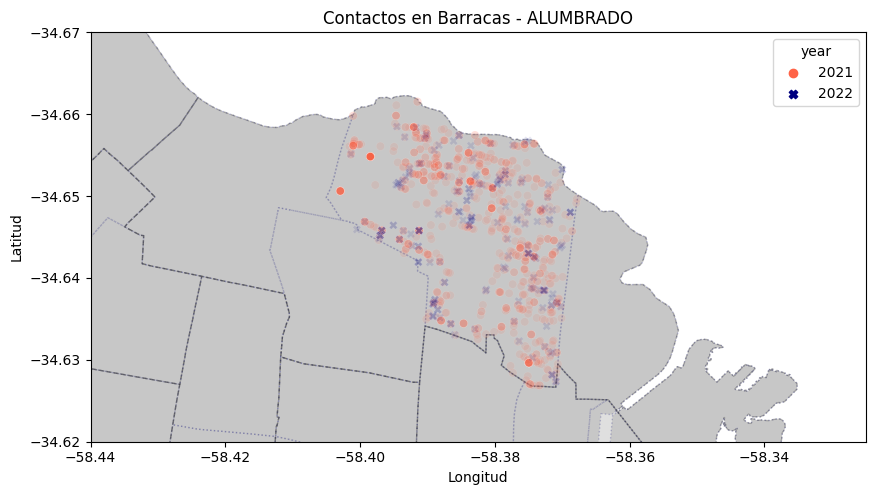

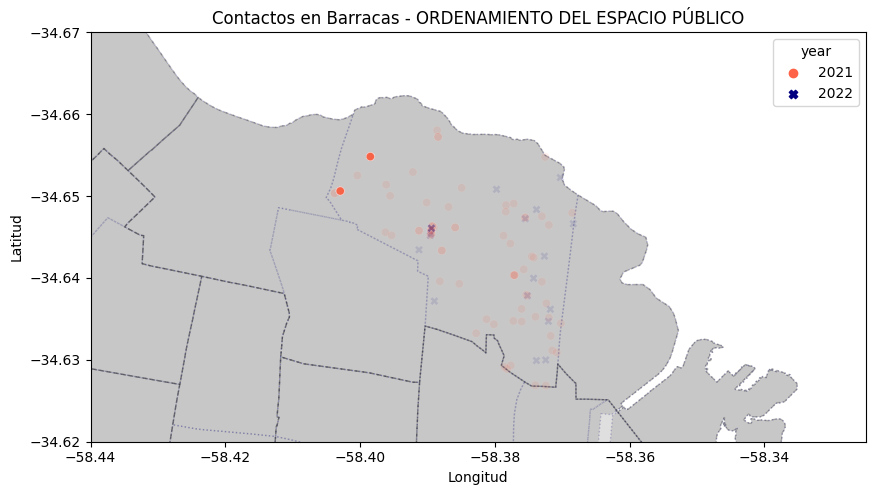

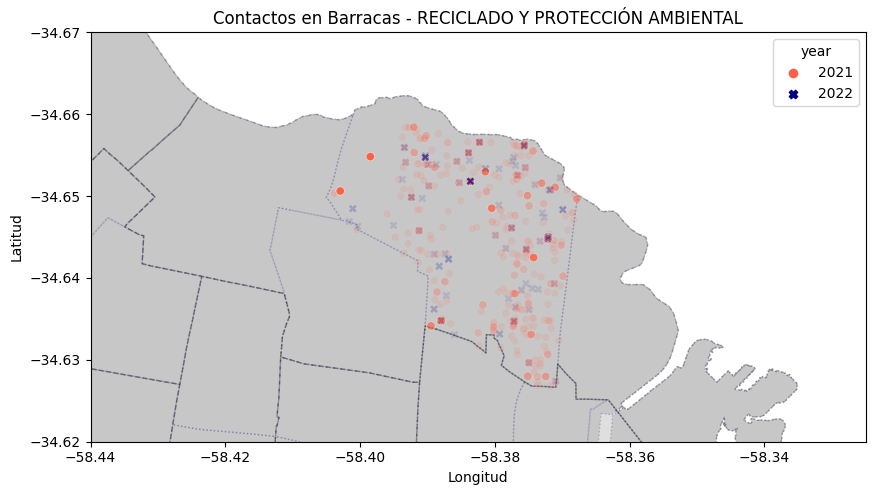

In [195]:

# plot map plots for each prioritary barrio-category
# split by year 

data_c4["year"] = data_c4.fecha_ingreso.dt.year


for barrio, categoria in priorities:
    print(barrio, "-", categoria)

    fig, ax = plt.subplots(1,1, figsize=(10,10))
        
    barrios.plot(ax=ax, alpha=.25, color="grey", edgecolor="navy", linewidth=1, linestyle="dotted")
    comunas.plot(ax=ax, alpha=.25, color="grey", edgecolor="black", linewidth=1, linestyle="--")
    
    # data_c4.loc[(data_c4.domicilio_barrio == barrio) & (data_c4.categoria == categoria)]\
    #     .plot(figsize=(10, 10), alpha=.1, color="tomato", markersize=10, ax=ax)
    sns.scatterplot(
        data=data_c4.loc[(data_c4.domicilio_barrio == barrio) & (data_c4.categoria == categoria)],
        x="lon",
        y="lat",
        hue="year",
        palette={
            2021: "tomato",
            2022: "navy"
        },
        style="year",
        alpha=.1
    )
    
    plt.xlim(COMUNA4_BBOX["x"])
    plt.ylim(COMUNA4_BBOX["y"])

    plt.title(f"Contactos en {barrio} - {categoria}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.savefig(f"./visuals/2021/contactos-{barrio}-{categoria}-byYear.png", bbox_inches="tight")
    

Barracas - BARRIOS EMERGENTES
Barracas - LIMPIEZA Y RECOLECCIÓN
Parque Patricios - LIMPIEZA Y RECOLECCIÓN
Nueva Pompeya - LIMPIEZA Y RECOLECCIÓN
Barracas - TRÁNSITO
Parque Patricios - TRÁNSITO
Nueva Pompeya - TRÁNSITO
Barracas - ALUMBRADO
Barracas - ORDENAMIENTO DEL ESPACIO PÚBLICO
Barracas - RECICLADO Y PROTECCIÓN AMBIENTAL


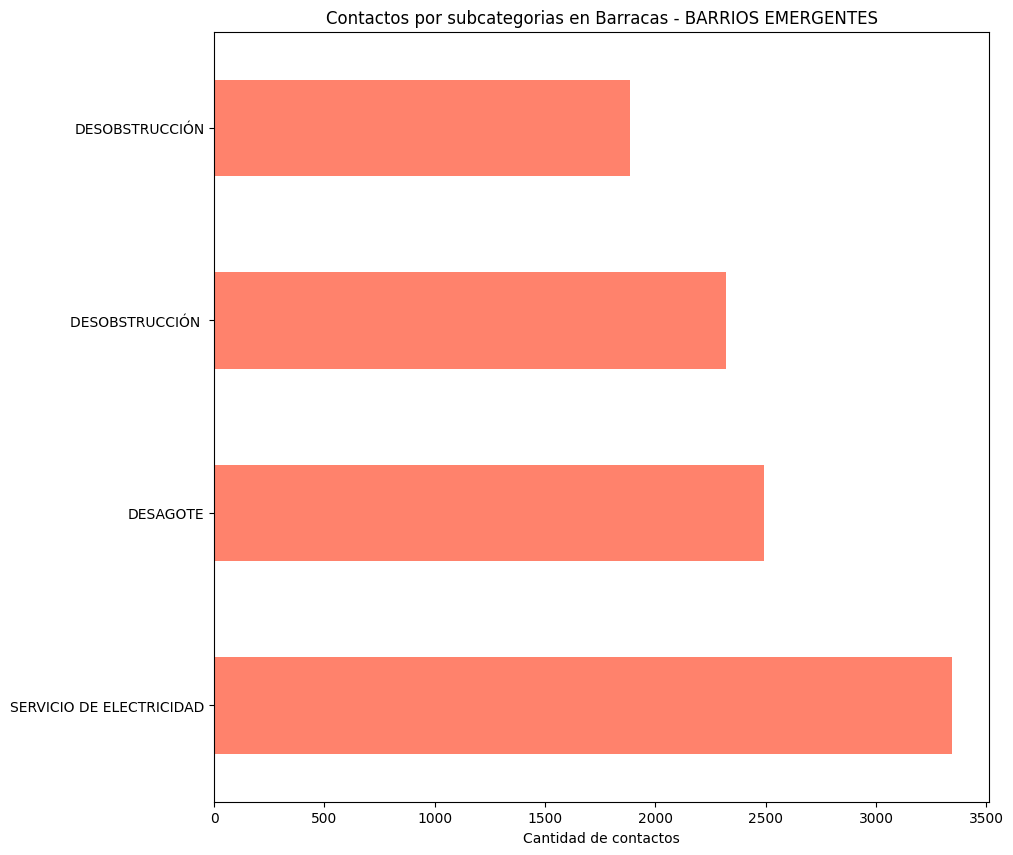

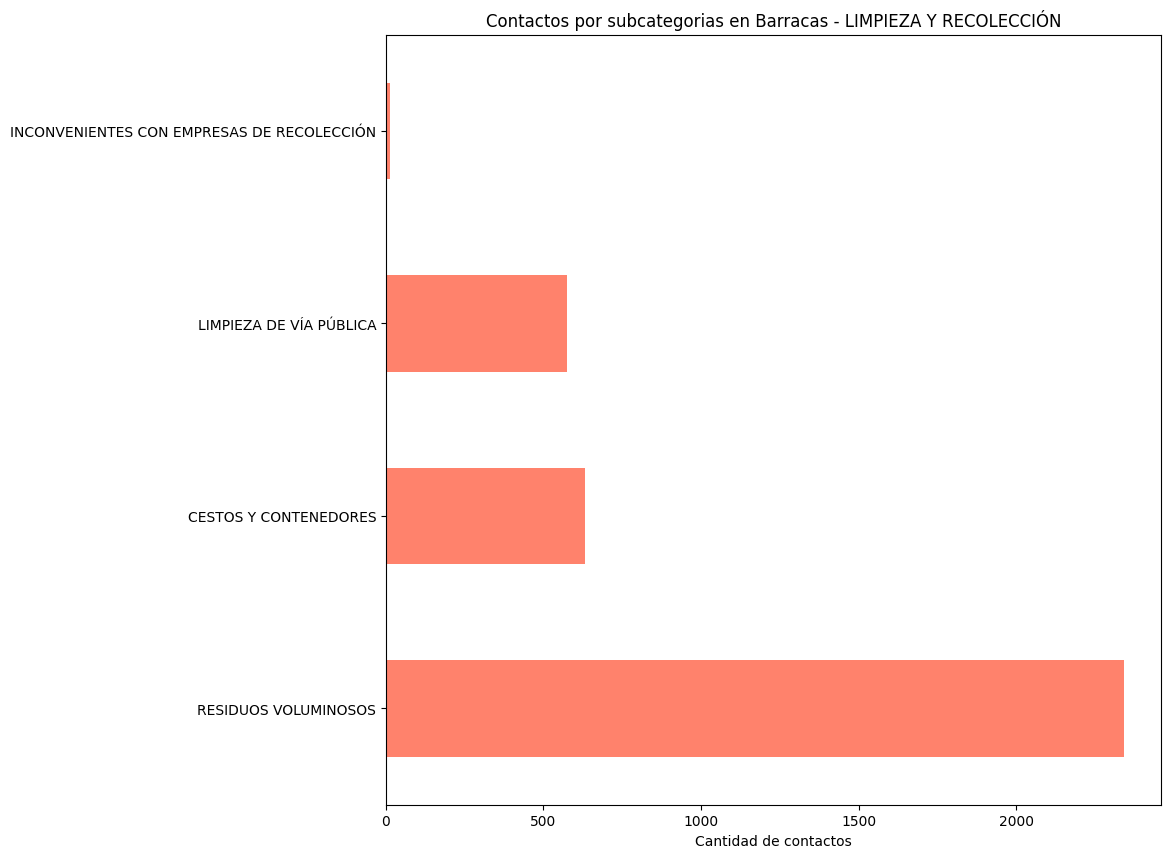

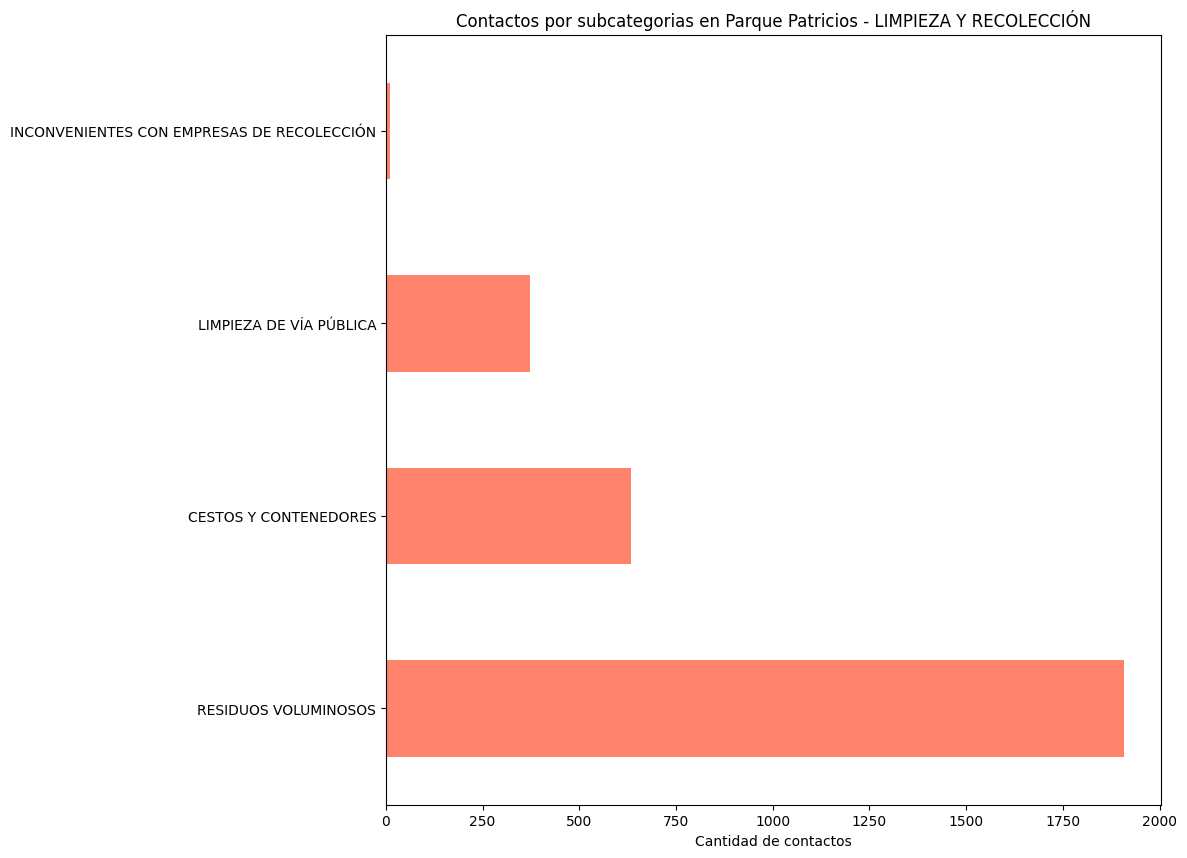

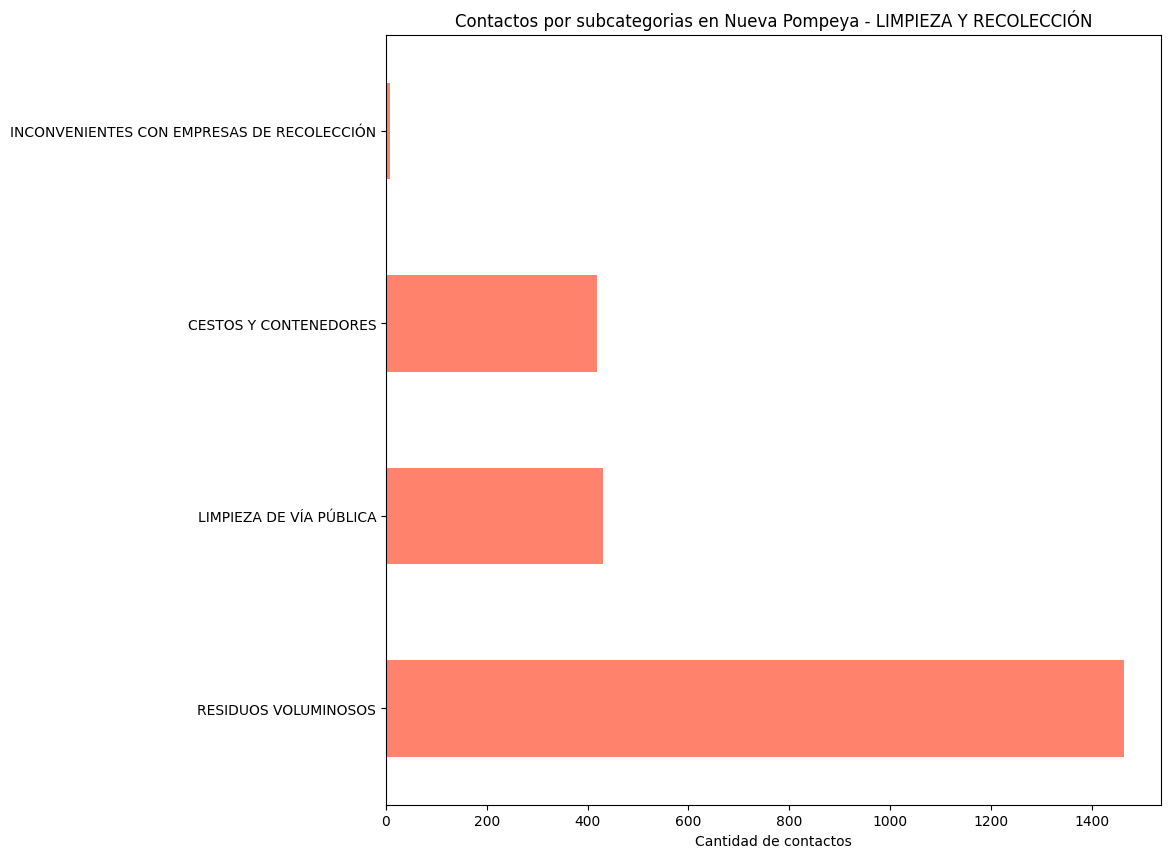

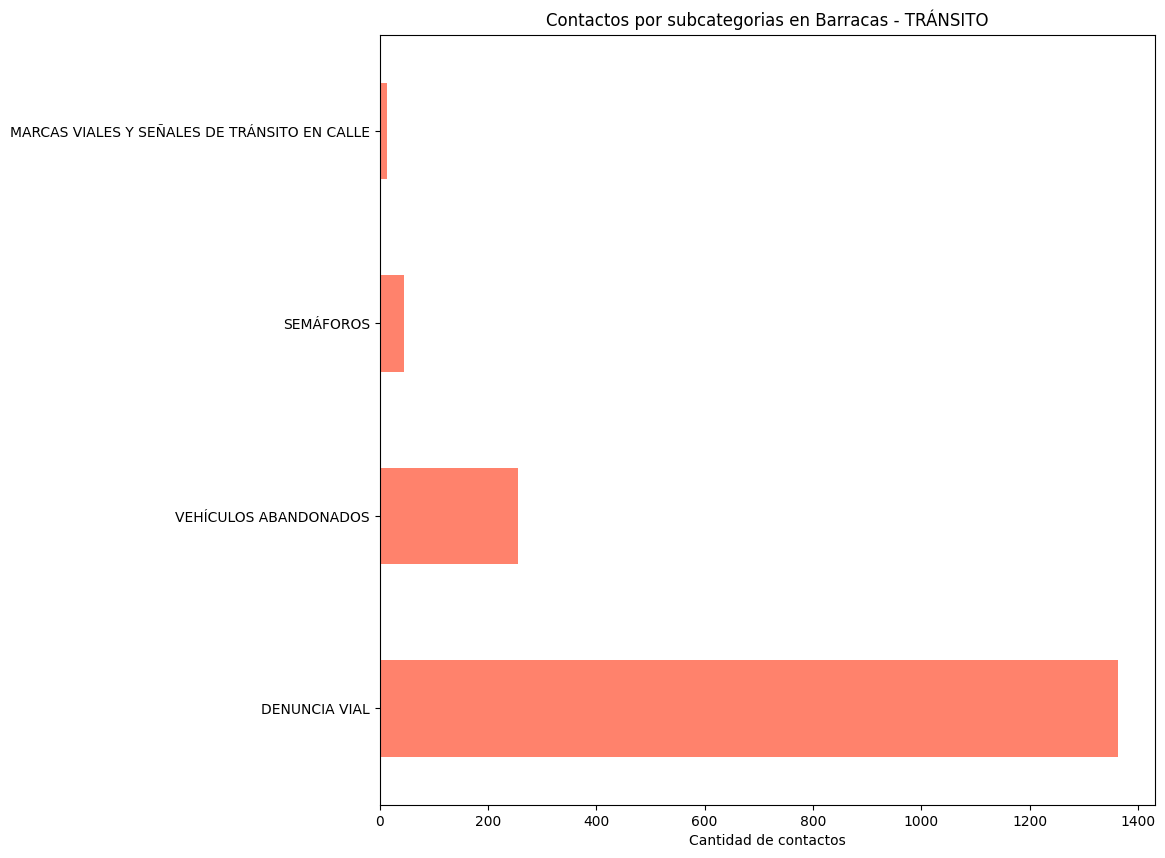

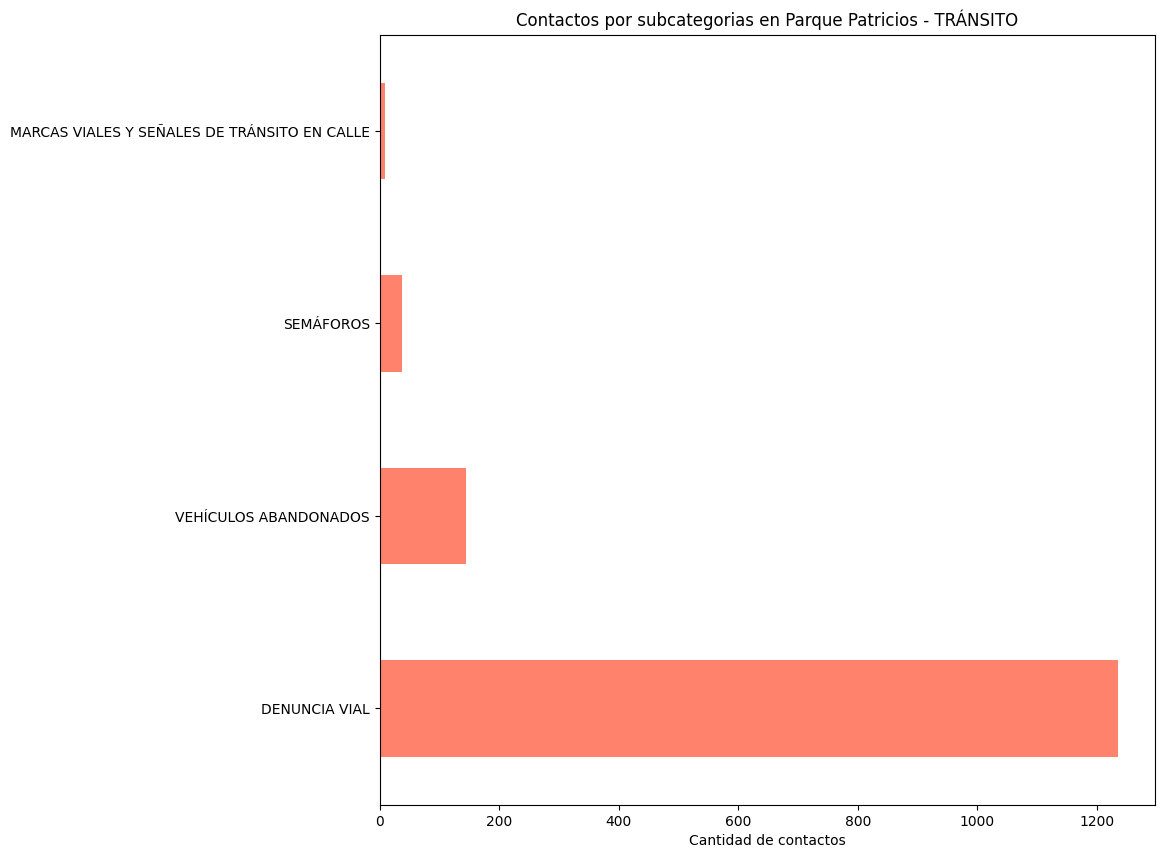

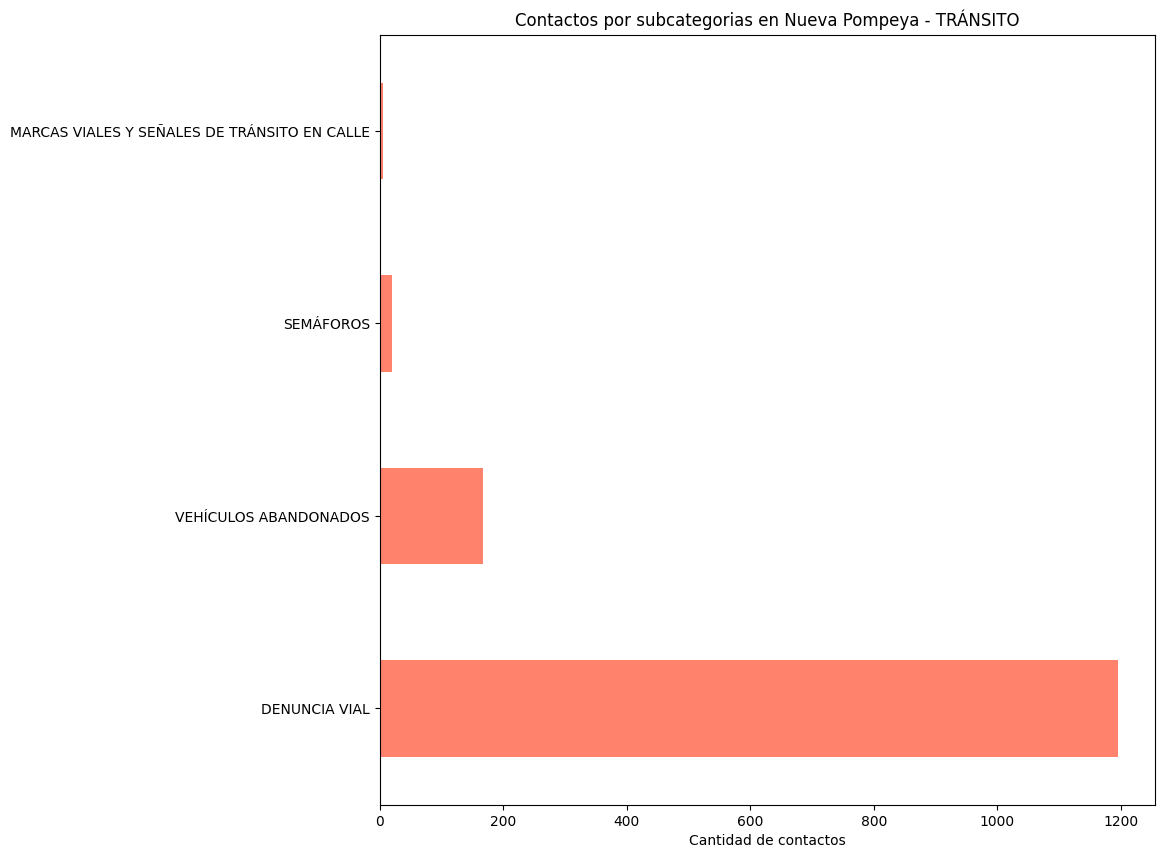

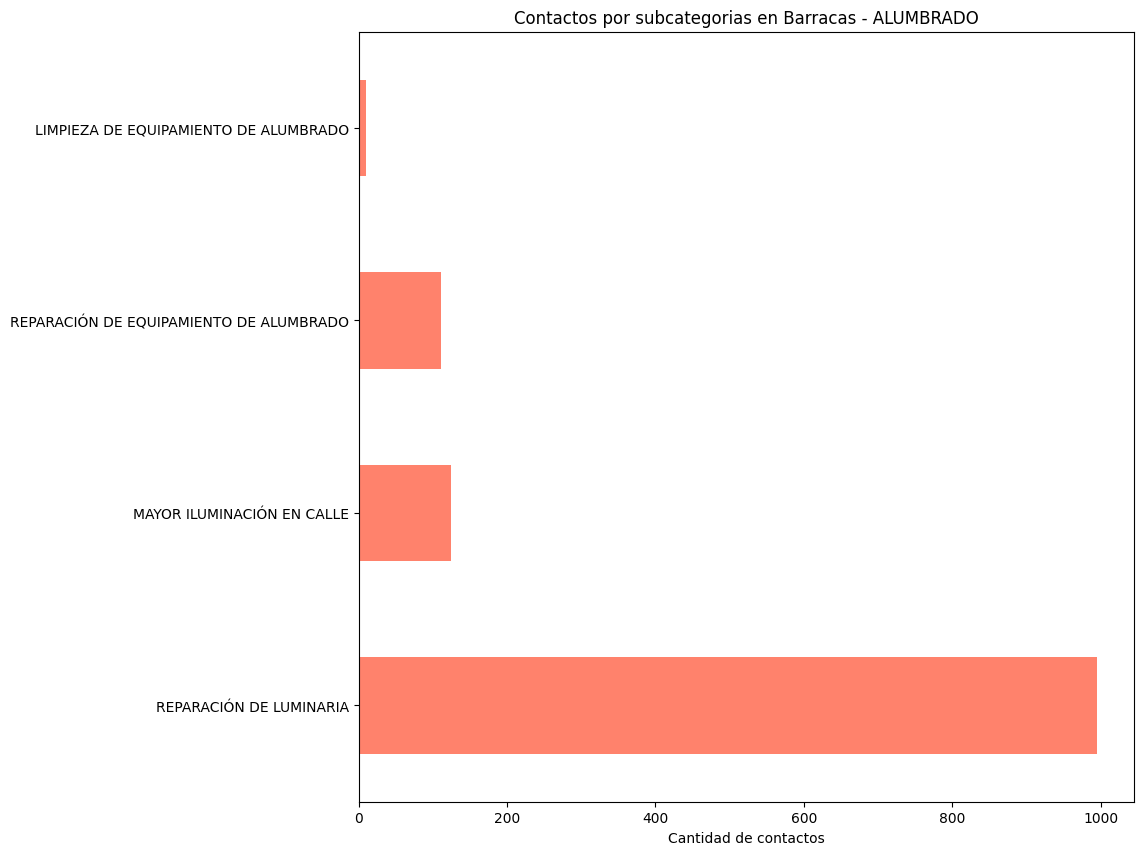

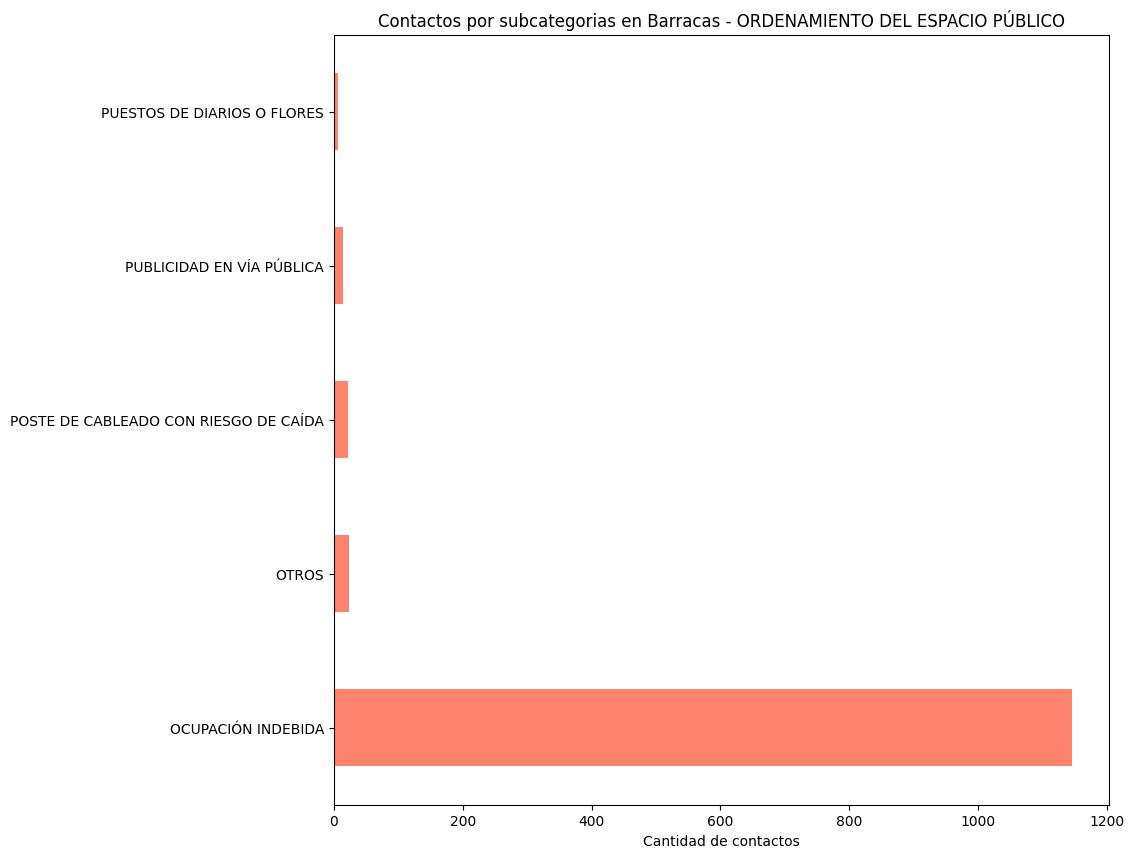

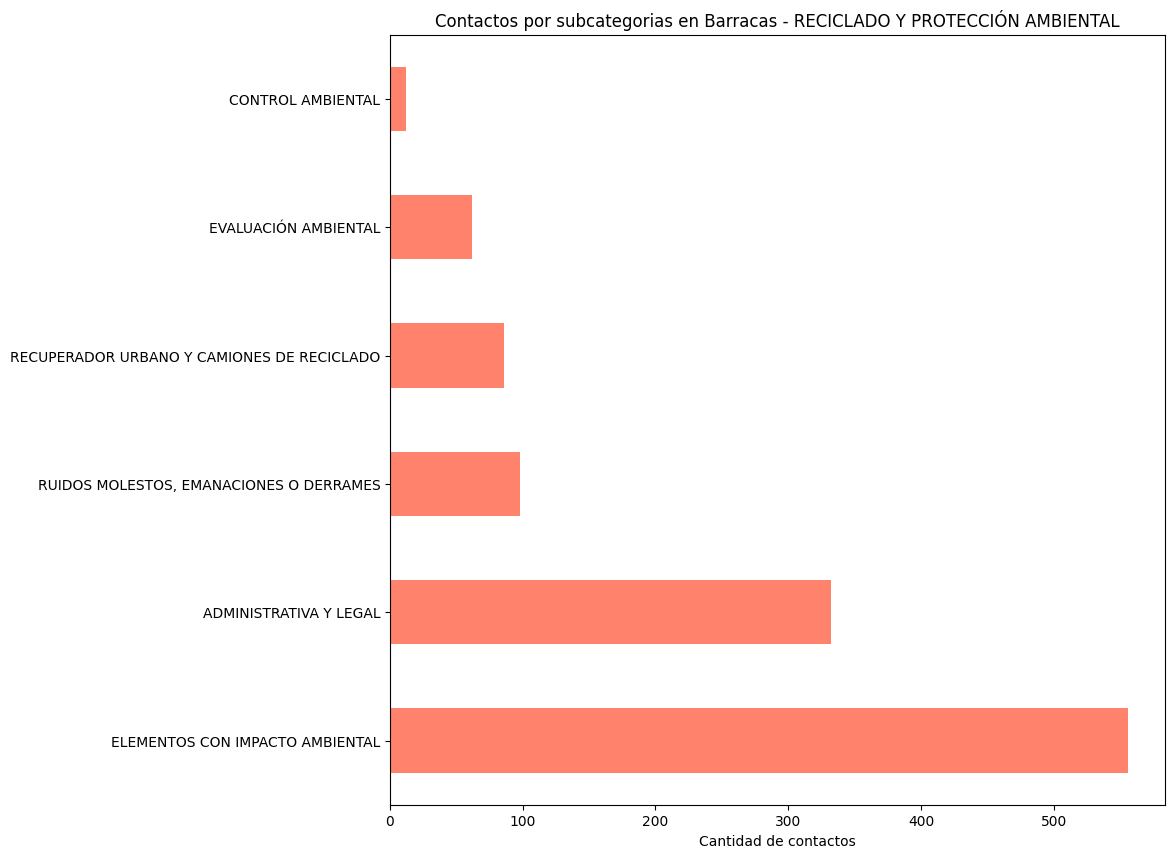

In [201]:
# identify composing subcategories

for barrio, categoria in priorities:
    print(barrio, "-", categoria)

    fig, ax = plt.subplots(1,1, figsize=(10,10))

    data_c4.loc[(data_c4.domicilio_barrio == barrio) & (data_c4.categoria == categoria)]\
        .groupby("subcategoria")\
        .contacto.size()\
        .sort_values(ascending=False)\
        .plot(kind="barh", alpha=.8, ax=ax, color="tomato")


    plt.title(f"Contactos por subcategorias en {barrio} - {categoria}")
    plt.xlabel("Cantidad de contactos")
    plt.ylabel("")
    plt.savefig(f"./visuals/2021/contactos-{barrio}-{categoria}-subcategorias.png", bbox_inches="tight")
    